In [1]:
# Necessary Imports
import pickle
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

/home/kwilliams/dev/stolen-probability-ptl/venv-torch-1.12.1/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Hull Proportions

In [6]:
# Load Hull Proportions From Disk
EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_32')
q_hulls = {}
k_hulls = {}

for path in EXPERIMENT_DIR.glob('*/q-hull-props-*'):
    with path.open('rb') as q_hull_file:
        q_hulls[path.parts[-2]] = pd.DataFrame(pickle.load(q_hull_file))

for path in EXPERIMENT_DIR.glob('*/k-hull-props-*'):
    with path.open('rb') as k_hull_file:
        k_hulls[path.parts[-2]] = pd.DataFrame(pickle.load(k_hull_file))

In [7]:
q_hulls['base'].describe()

3           4
count  527.000000  527.000000
mean     0.024030    0.025064
std      0.003812    0.003704
min      0.013672    0.015625
25%      0.021484    0.023438
50%      0.023438    0.025391
75%      0.027344    0.027344
max      0.035156    0.035156

In [8]:
k_hulls['base'].describe()

3           4
count  527.000000  527.000000
mean     0.026999    0.032162
std      0.004067    0.004460
min      0.015625    0.021484
25%      0.023438    0.029297
50%      0.027344    0.033203
75%      0.029297    0.035156
max      0.041016    0.046875

In [9]:
q_hulls['euc'].describe()

2           3           4           5
count  527.000000  527.000000  527.000000  527.000000
mean     0.030453    0.025628    0.022989    0.025365
std      0.005467    0.003736    0.003556    0.003632
min      0.017578    0.017578    0.013672    0.013672
25%      0.027344    0.023438    0.021484    0.023438
50%      0.029297    0.025391    0.023438    0.025391
75%      0.035156    0.027344    0.025391    0.027344
max      0.050781    0.037109    0.035156    0.039062

In [10]:
k_hulls['euc'].describe()

2           3           4           5
count  527.000000  527.000000  527.000000  527.000000
mean     0.034552    0.029612    0.022081    0.024661
std      0.004981    0.004322    0.003899    0.004028
min      0.021484    0.019531    0.011719    0.013672
25%      0.031250    0.027344    0.019531    0.021484
50%      0.035156    0.029297    0.021484    0.023438
75%      0.037109    0.032227    0.025391    0.027344
max      0.050781    0.044922    0.037109    0.039062

# Loss Statistics

### `n_heads_32`

In [36]:
# Load Loss Statistics From Disk
train_freqs = torch.load('./data/wikitext-103/unigram-token-counts.pt')

EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_32')
loss_stats = {}

for path in EXPERIMENT_DIR.glob('*/val-loss-stats.csv'):
    loss_stats[path.parts[-2]] = pd.read_csv(path)

<Axes: xlabel='None', ylabel='val_freq'>

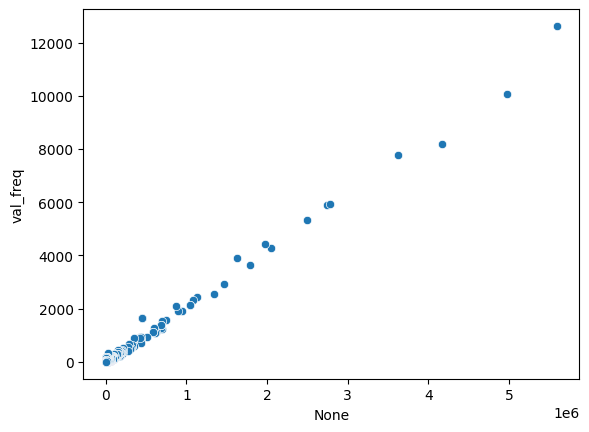

In [15]:
# Visualize train and validation proportions of tokens
'''
There appears to be a strong linear relationship between train and test occurrence of tokens.
This suggests that the training distribution is relatively close to the test distribution. 
'''
sns.scatterplot(x=train_freqs, y=loss_stats['base']['val_freq'])

<Axes: xlabel='None', ylabel='avg_loss'>

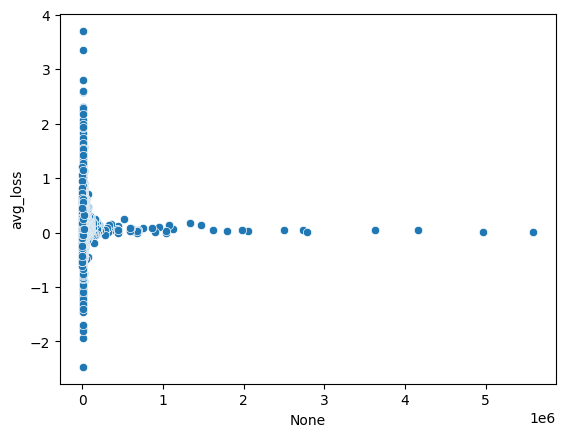

In [16]:
# Visualize base vs. other models' losses vs train frequency
'''
Here, I plot the loss difference of a token between the two models. As such, a higher y-value
corresponds to the base model being worse at predicting that token. The models are equally 
good at predicting frequent tokens, but there are tradeoffs for infrequent ones. Sometimes base is
worse, sometimes it is better. 
'''
loss_diff = loss_stats['base']['avg_loss'] - loss_stats['euc']['avg_loss']
sns.scatterplot(x=train_freqs, y=loss_diff)

0.16416979531277537
0.143440543831169


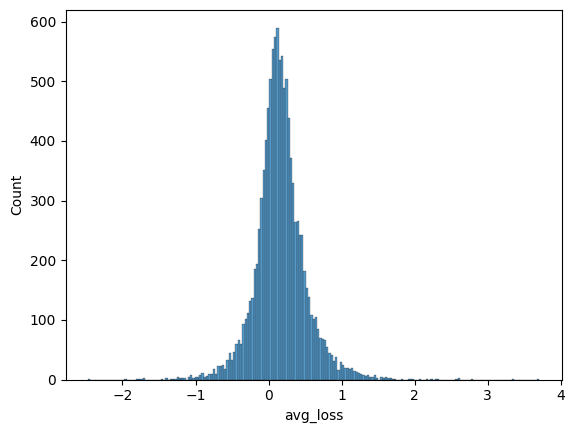

In [19]:
# Visualize histogram of loss_diff to get a sense for its distribution
'''
Loss_diff seems to be centered at a value slightly greater than 0. Printing the mean/median
confirms that loss_diff is slightly positive. This means that there are more tokens for which
the base model is worse than a Euclidean distance model. This is expected, as the euc model
achieved a lower overall minimum on its loss curve. 
'''
sns.histplot(x=loss_diff)
print(loss_diff.mean())
print(loss_diff.median())

### `n_heads_16`

In [52]:
# Load Loss Statistics From Disk
train_freqs = torch.load('./data/wikitext-103/unigram-token-counts.pt')

EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_16')
loss_stats = {}

for path in EXPERIMENT_DIR.glob('*/val-loss-stats.csv'):
    loss_stats[path.parts[-2]] = pd.read_csv(path)

<Axes: xlabel='None', ylabel='avg_loss'>

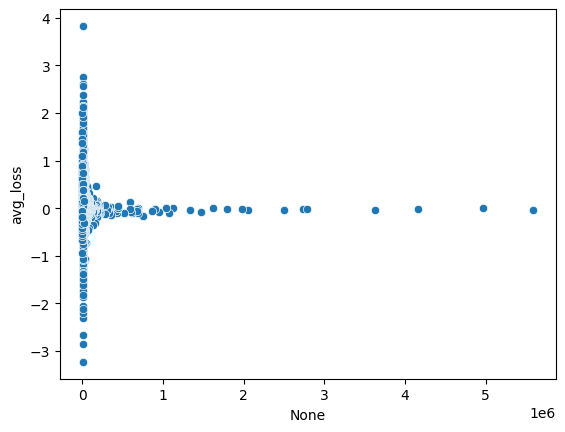

In [53]:
# Visualize base vs. other models' losses vs train frequency
'''
Here, I plot the loss difference of a token between the two models. As such, a higher y-value
corresponds to the base model being worse at predicting that token. The models are equally 
good at predicting frequent tokens, but there are tradeoffs for infrequent ones. Sometimes base is
worse, sometimes it is better. 
'''
loss_diff = loss_stats['euc']['avg_loss'] - loss_stats['man']['avg_loss']
sns.scatterplot(x=train_freqs, y=loss_diff)

0.13222120681214097
0.1015625


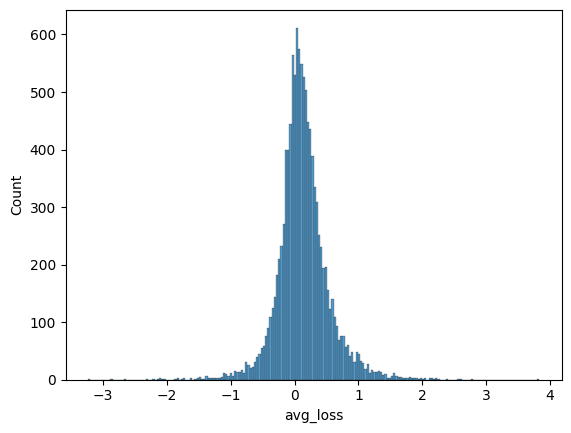

In [54]:
# Visualize histogram of loss_diff to get a sense for its distribution
'''
Loss_diff seems to be centered at a value slightly greater than 0. Printing the mean/median
confirms that loss_diff is slightly positive. This means that there are more tokens for which
the base model is worse than a Euclidean distance model. This is expected, as the euc model
achieved a lower overall minimum on its loss curve. 

Compared to `n_heads_32`, this histogram is even more off-center. This suggests that there is 
a greater difference between the two models' prediction accuracies as we increase the head
dimension. 

NOTE: When replacing 'euc' with 'man' for this group of models, the loss_diff column is even
more off-center. This again lines up with how 'man' achieved lower loss than 'euc' when heads had
a dimensionality of 4. 
'''
sns.histplot(x=loss_diff)
print(loss_diff.mean())
print(loss_diff.median())

### `n_heads_8`

In [34]:
# Load Loss Statistics From Disk
train_freqs = torch.load('./data/wikitext-103/unigram-token-counts.pt')

EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_8')
loss_stats = {}

for path in EXPERIMENT_DIR.glob('*/val-loss-stats.csv'):
    loss_stats[path.parts[-2]] = pd.read_csv(path)

<Axes: xlabel='None', ylabel='avg_loss'>

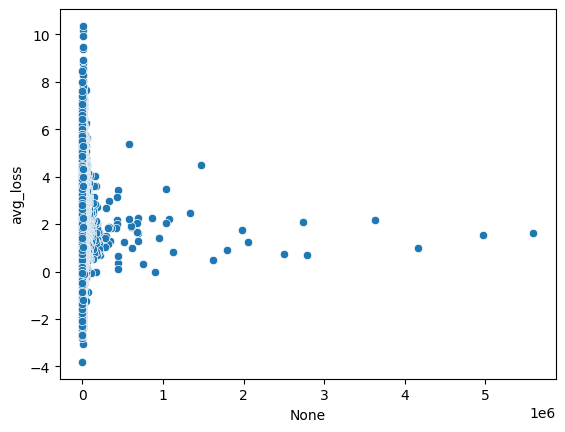

In [48]:
# Visualize base vs. other models' losses vs train frequency
'''
Here, I plot the loss difference of a token between the two models. As such, a higher y-value
corresponds to the base model being worse at predicting that token. The models are equally 
good at predicting frequent tokens, but there are tradeoffs for infrequent ones. Sometimes base is
worse, sometimes it is better. 
'''
loss_diff = loss_stats['euc-positional']['avg_loss'] - loss_stats['man-positional']['avg_loss']
sns.scatterplot(x=train_freqs, y=loss_diff)

1.528855883879666
1.322423135080645


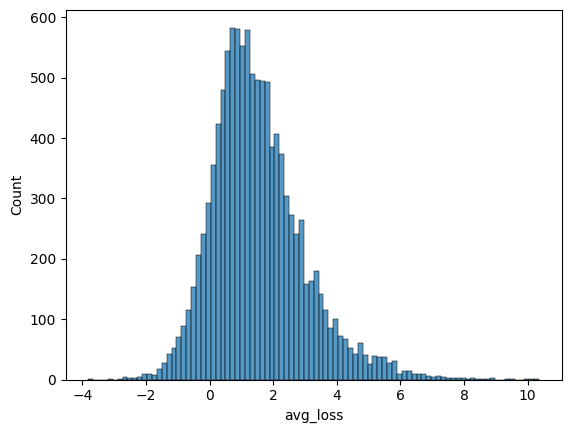

In [49]:
# Visualize histogram of loss_diff to get a sense for its distribution
'''
Loss_diff seems to be centered at a value slightly greater than 0. Printing the mean/median
confirms that loss_diff is slightly positive. This means that there are more tokens for which
the base model is worse than a Euclidean distance model. This is expected, as the euc model
achieved a lower overall minimum on its loss curve. 

Compared to `n_heads_32` or `n_heads_16`, this histogram is even more off-center. This suggests that there is 
a greater difference between the two models' prediction accuracies as we increase the head
dimension. Furthermore, there is an even greater difference between `euc-positional` and `man-positional`.

Here are the (mean, median) pairs when loss_diff is as follows:
* `base` - `euc-positional` --> (0.194, 0.240)
* `base` - `man-positional` --> (1.723, 1.651)
* `euc-positional` - `man-positional` --> (1.529, 1.322)

This is extremely interesting given that the `euc-positional` and `man-positional` models had extremely
similar (nearly overlapping) training curves. I wonder what the difference between `base` and
`base-positional` would be given that they also had the same training curve. Regardless, it appears as though
for the majority of tokens, Manhattan distance outperforms Euclidean distance. The difference in quality
is even greater as the number of heads decreases from 16 to 8. More investigation should be done to examine
why there is such a difference given the identical loss curve. 
'''
sns.histplot(x=loss_diff)
print(loss_diff.mean())
print(loss_diff.median())

# Hull Statistics

## `n_heads_32`

In [21]:
# Load Loss Statistics From Disk
train_freqs = torch.load('./data/wikitext-103/unigram-token-counts.pt')

EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_32')
hull_stats = {}
loss_stats = {}

for path in EXPERIMENT_DIR.glob('*/hull-stats.csv'):
    hull_stats[path.parts[-2]] = pd.read_csv(path)
    hull_stats[path.parts[-2]]['train_freq'] = train_freqs

for path in EXPERIMENT_DIR.glob('*/val-loss-stats.csv'):
    loss_stats[path.parts[-2]] = pd.read_csv(path)

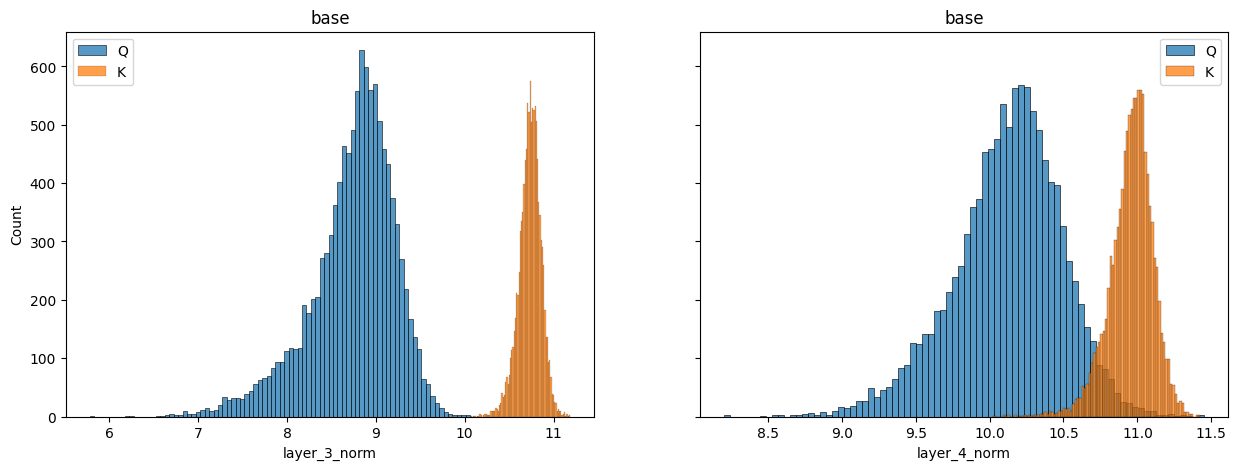

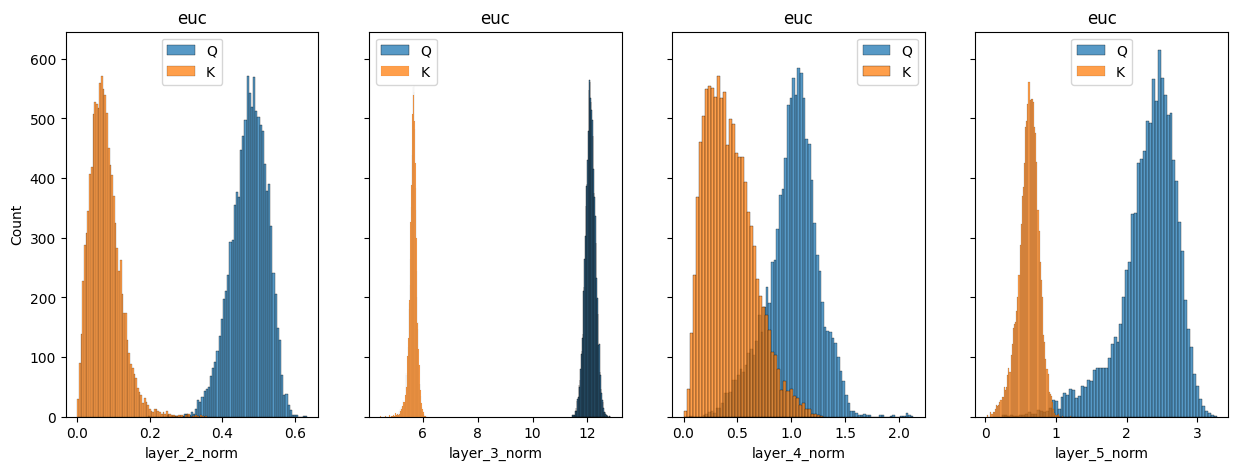

In [36]:
# What is the distribution of embedding norms for the Q/K matrices?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('q_norm')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.histplot(x=hull_stats[exp][col], ax=ax[i], label='Q')
        sns.histplot(x=hull_stats[exp][col.replace("q", "k")], ax=ax[i], label='K')
        ax[i].set_title(exp)
        ax[i].legend()
        ax[i].set_xlabel(col.replace("_q", ""))

**Analysis:** In all layers for which the Q/K matrices are not deficient, the `base` model has higher embedding norms in the K space. However, the `euc` model shows the opposite interaction. Furthermore, besides the 3rd layer of the `euc` model, embedding norms are much smaller than the `base` model.

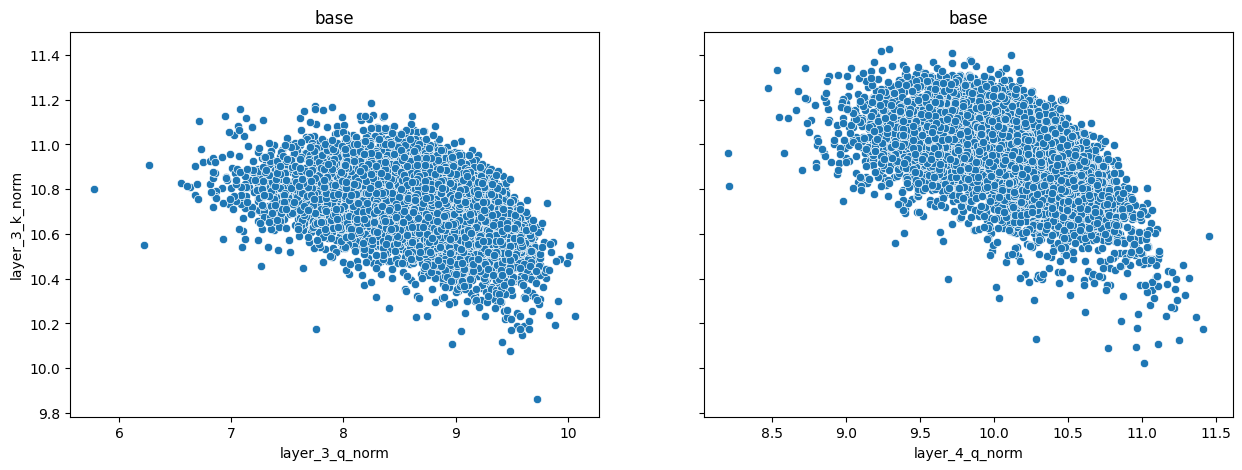

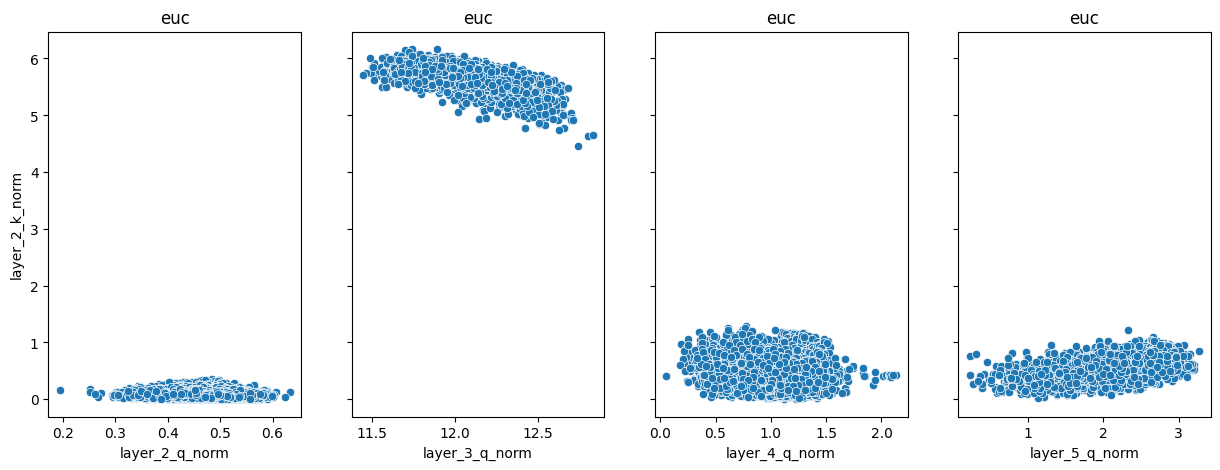

In [39]:
# What is the relationship between embedding norms in the Q/K spaces?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('q_norm')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        k_col = col.replace("q", "k")
        sns.scatterplot(data=hull_stats[exp], x=col, y=k_col, ax=ax[i])
        ax[i].set_title(exp)

**Analysis:** There doesn't seem to be a significant linear relationship between the Q/K norms of a token.

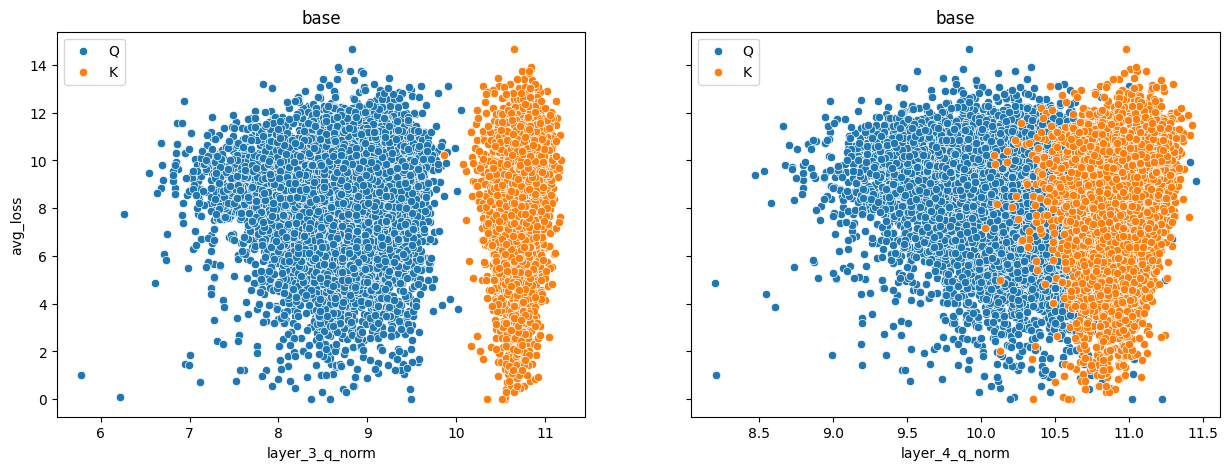

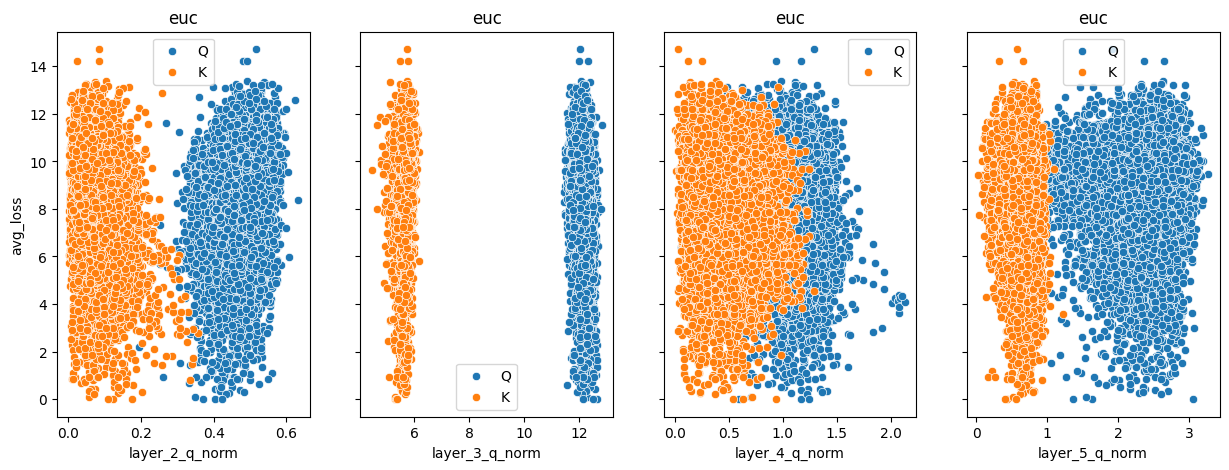

In [42]:
# Is there a relationship between the embedding norm and a token's loss?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('q_norm')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, q_col in enumerate(active_cols):
        k_col = q_col.replace("q", "k")
        sns.scatterplot(x=hull_stats[exp][q_col], y=loss_stats[exp]['avg_loss'], ax=ax[i], label='Q')
        sns.scatterplot(x=hull_stats[exp][k_col], y=loss_stats[exp]['avg_loss'], ax=ax[i], label='K')
        ax[i].set_title(exp)

**Analysis:** This is also a dead end. There doesn't seem to be a quantifiable relationship between an embedding's norm and its loss. This might be due to my collection process only using the first head of a layer; it might be that the norm over all heads may be significant. If this is true, the 32-head experiments would be significantly impacted due to the variance introduced by selecting only the first head.

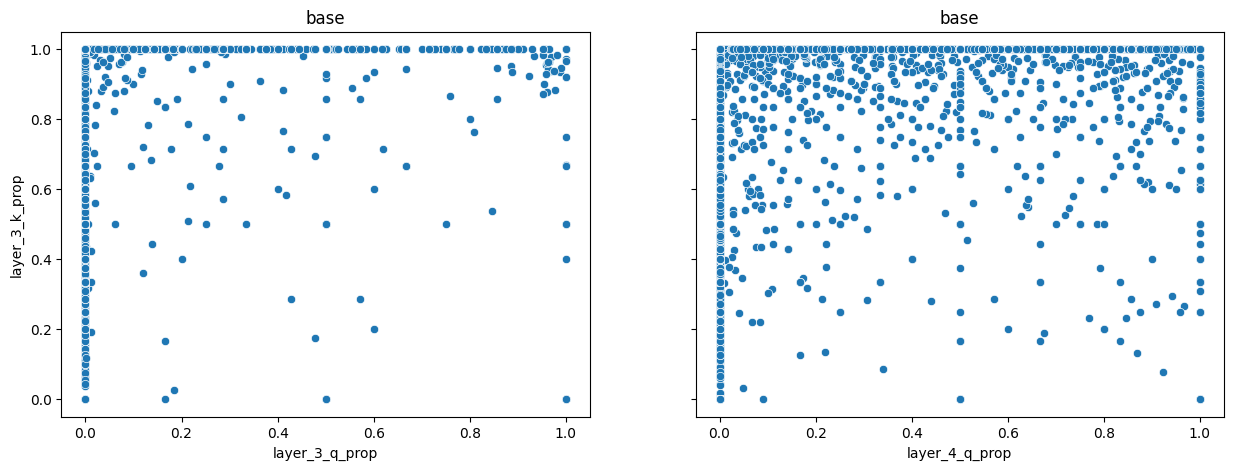

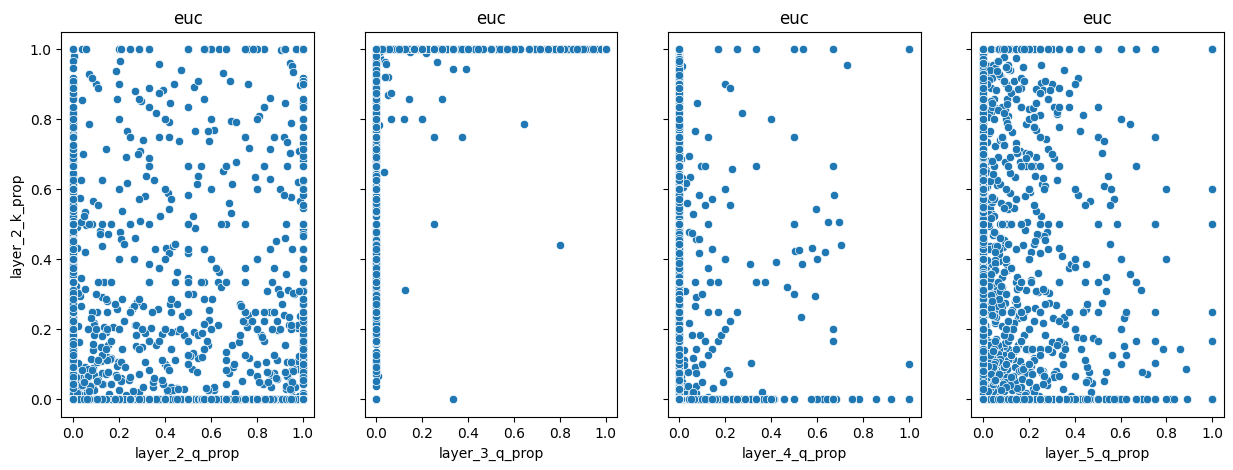

In [3]:
# Is there a relationship between the vertex proportion in the Q/K hulls?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('q_prop')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, q_col in enumerate(active_cols):
        k_col = q_col.replace("q", "k")
        sns.scatterplot(x=hull_stats[exp][q_col], y=hull_stats[exp][k_col], ax=ax[i])
        ax[i].set_title(exp)

**Analysis:** In general, there doesn't seem to be a clear relationship between a token's prevalence on the vertices of the Q/K hulls. However, the `base` model displays an interesting L-shape. Most tokens are either never vertices of the Q hull, or always vertices of the K hull. The third layer of the `euc` model also displays this property. However, the other layers of the `euc` model have a different L-shape; most tokens are a vertex of only one of the two hulls. Perhaps my confusion matrix co-occurrence statistics can tell a better story. This might also have to do with the low dimensionality of the heads in this group of models.

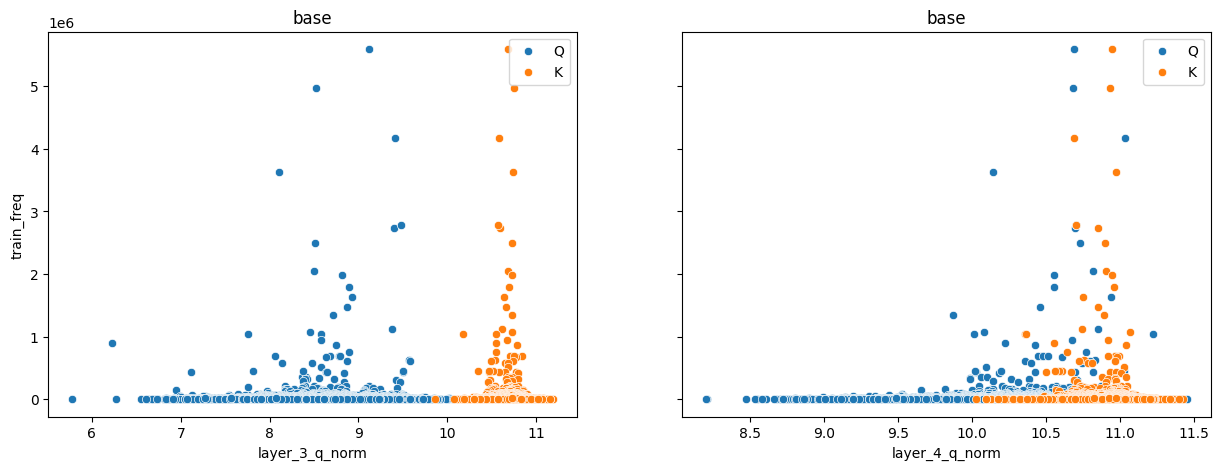

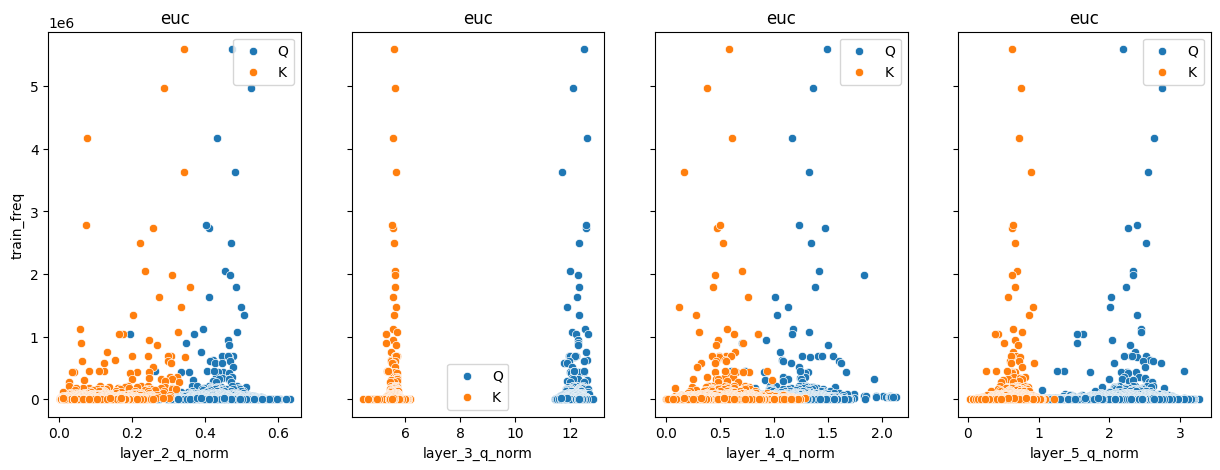

In [5]:
# Is there a relationship between the training frequency and norm of an embedding in the Q/K hulls?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('q_norm')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, q_col in enumerate(active_cols):
        k_col = q_col.replace("q", "k")
        sns.scatterplot(x=hull_stats[exp][q_col], y=hull_stats[exp]['train_freq'], ax=ax[i], label='Q')
        sns.scatterplot(x=hull_stats[exp][k_col], y=hull_stats[exp]['train_freq'], ax=ax[i], label='K')
        ax[i].set_title(exp)

**Analysis:** Training frequency seems to have nothing to do with the embedding's norm. Again, this could potentially be due to the selection of a single head.

In [22]:
# Do any columns have a strong correlation with validation loss?
for exp in hull_stats:
    print(exp)
    print(hull_stats[exp].corrwith(loss_stats[exp]['avg_loss']).abs().sort_values(ascending=False).head(5))
    print()

base
token_id              0.654644
layer_4_q_norm_var    0.225308
layer_4_q_and_k       0.224406
layer_4_k_norm_var    0.217168
layer_4_k_prop        0.212608
dtype: float64

euc
token_id              0.630093
layer_4_q_norm_var    0.321095
layer_5_k_norm_var    0.283735
layer_4_k_norm_var    0.282908
layer_3_q_norm_var    0.224661
dtype: float64



## `n_heads_8`

In [6]:
# Load Loss Statistics From Disk
train_freqs = torch.load('./data/wikitext-103/unigram-token-counts.pt')

EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_8')
hull_stats = {}
loss_stats = {}

for path in EXPERIMENT_DIR.glob('*/hull-stats.csv'):
    hull_stats[path.parts[-2]] = pd.read_csv(path)
    hull_stats[path.parts[-2]]['train_freq'] = train_freqs

for path in EXPERIMENT_DIR.glob('*/val-loss-stats.csv'):
    loss_stats[path.parts[-2]] = pd.read_csv(path)

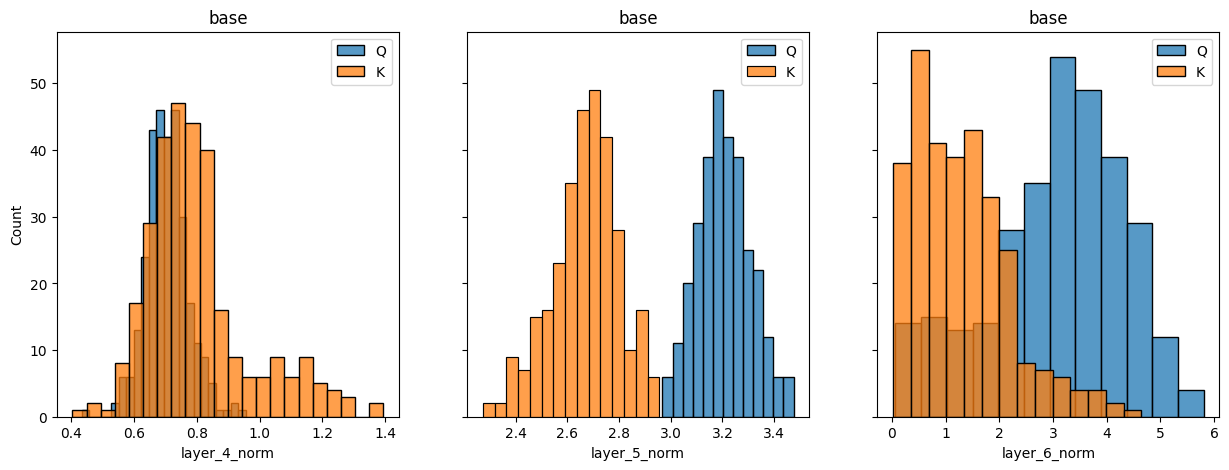

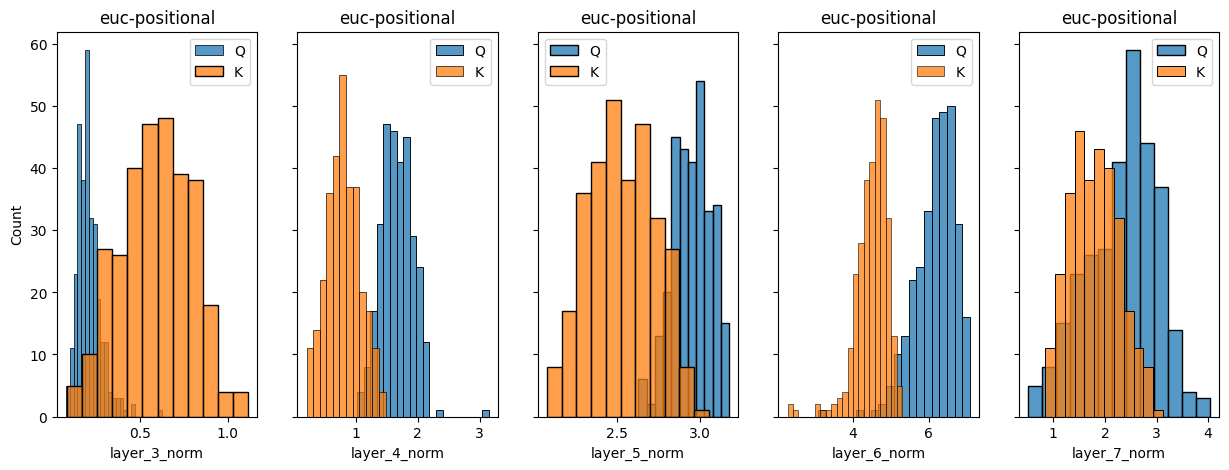

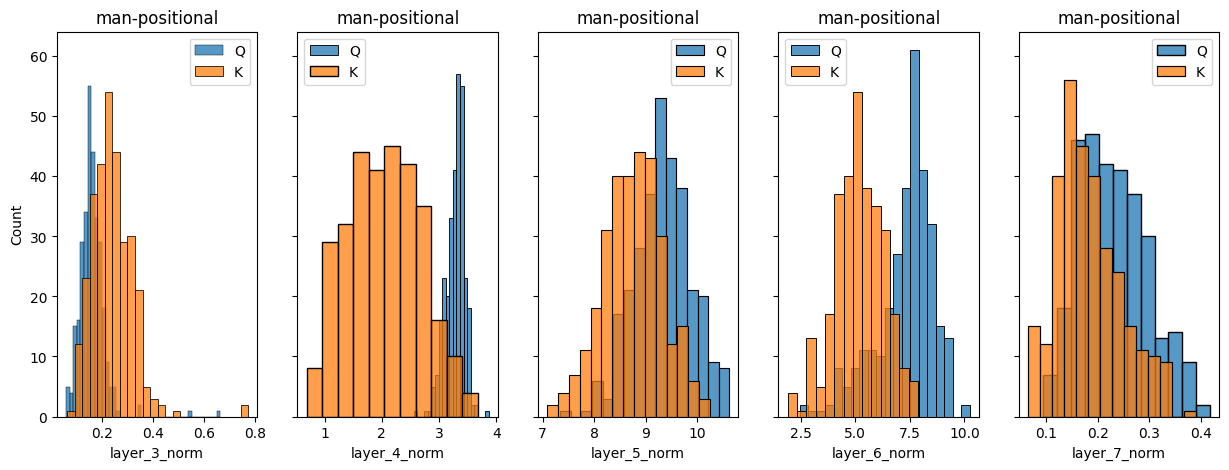

In [7]:
# What is the distribution of embedding norms for the Q/K matrices?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('q_norm')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.histplot(x=hull_stats[exp][col], ax=ax[i], label='Q')
        sns.histplot(x=hull_stats[exp][col.replace("q", "k")], ax=ax[i], label='K')
        ax[i].set_title(exp)
        ax[i].legend()
        ax[i].set_xlabel(col.replace("_q", ""))

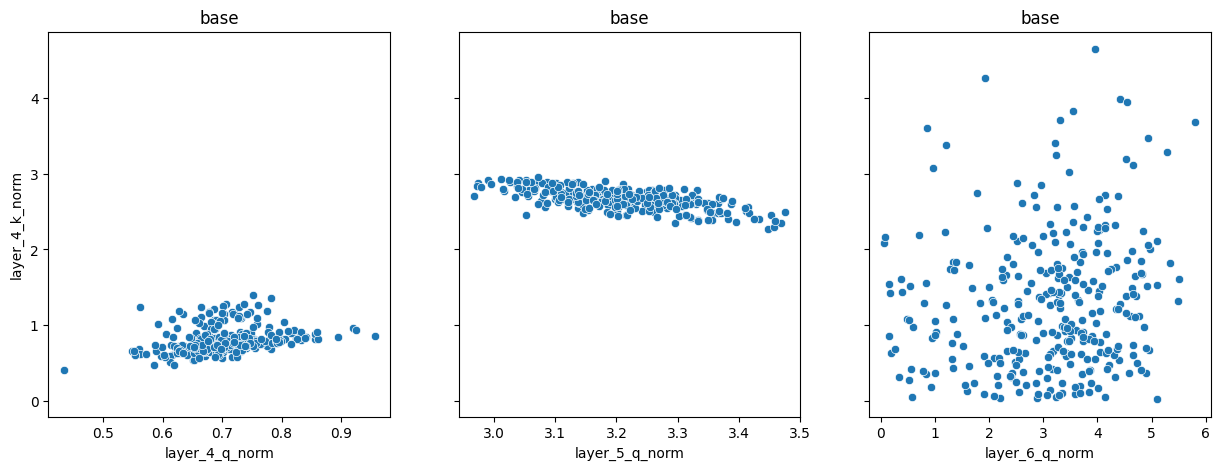

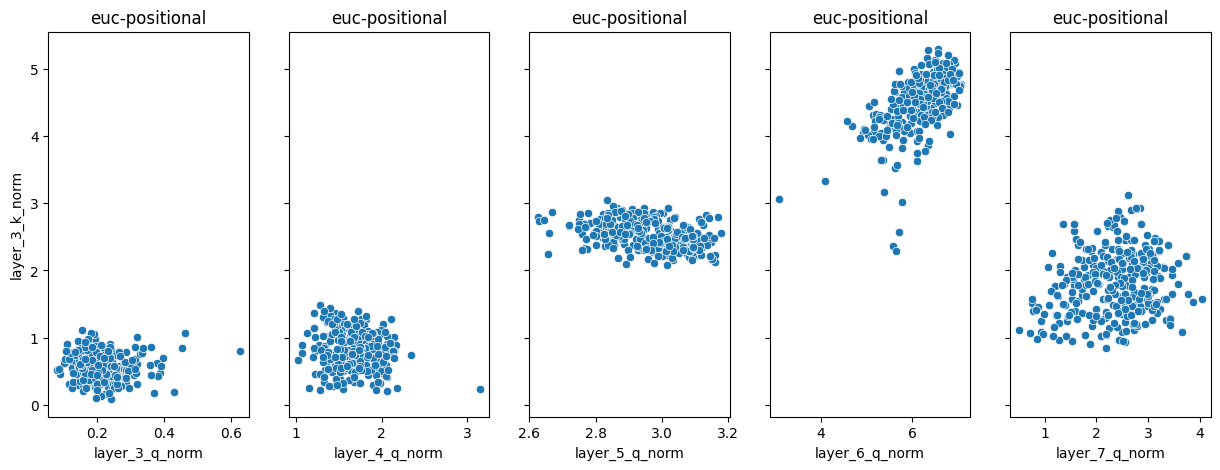

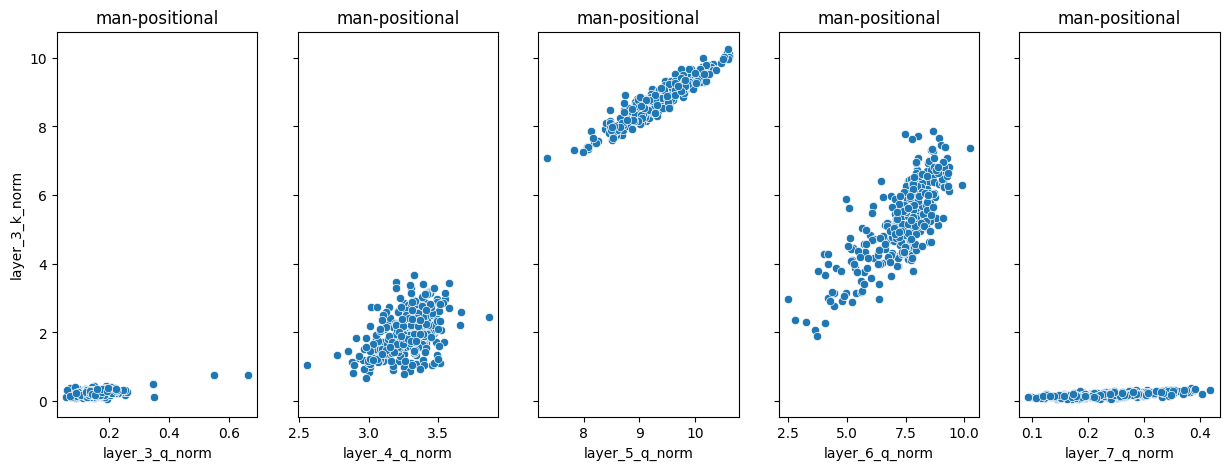

In [8]:
# What is the relationship between embedding norms in the Q/K spaces?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('q_norm')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        k_col = col.replace("q", "k")
        sns.scatterplot(data=hull_stats[exp], x=col, y=k_col, ax=ax[i])
        ax[i].set_title(exp)

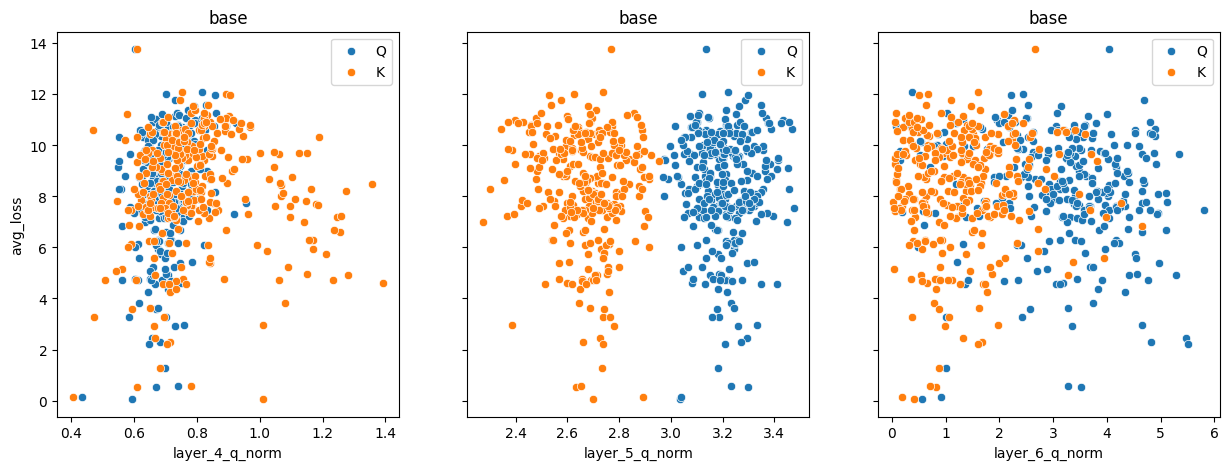

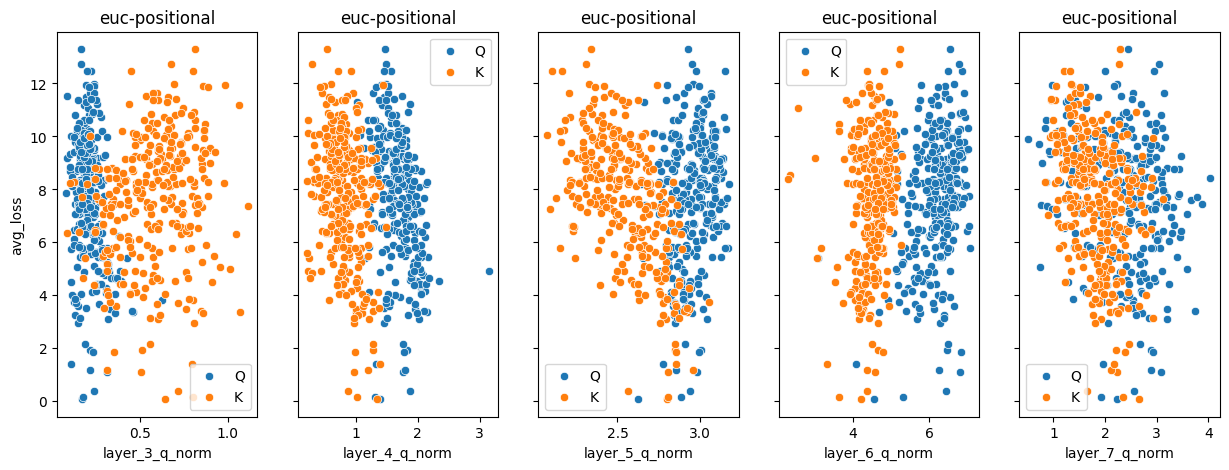

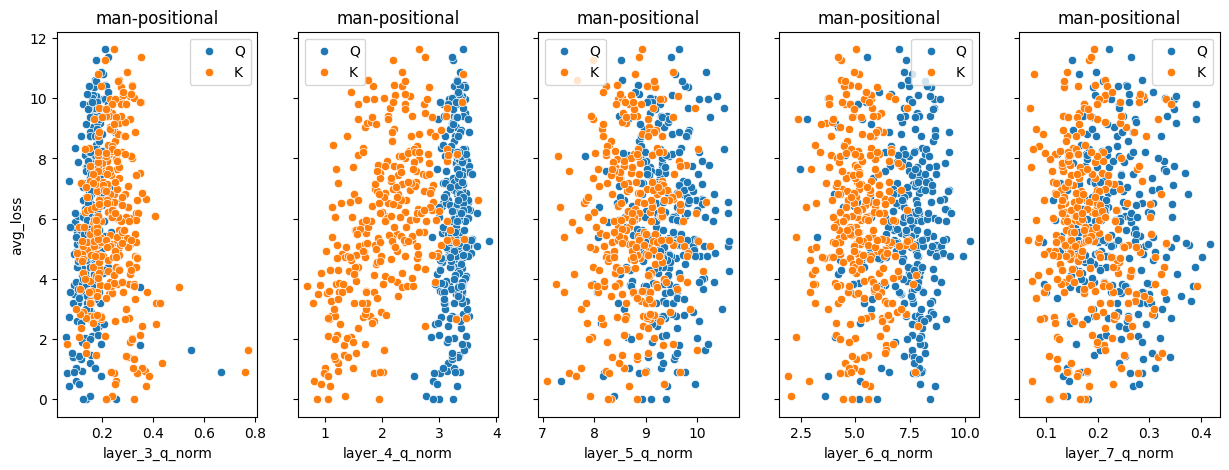

In [9]:
# Is there a relationship between the embedding norm and a token's loss?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('q_norm')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, q_col in enumerate(active_cols):
        k_col = q_col.replace("q", "k")
        sns.scatterplot(x=hull_stats[exp][q_col], y=loss_stats[exp]['avg_loss'], ax=ax[i], label='Q')
        sns.scatterplot(x=hull_stats[exp][k_col], y=loss_stats[exp]['avg_loss'], ax=ax[i], label='K')
        ax[i].set_title(exp)

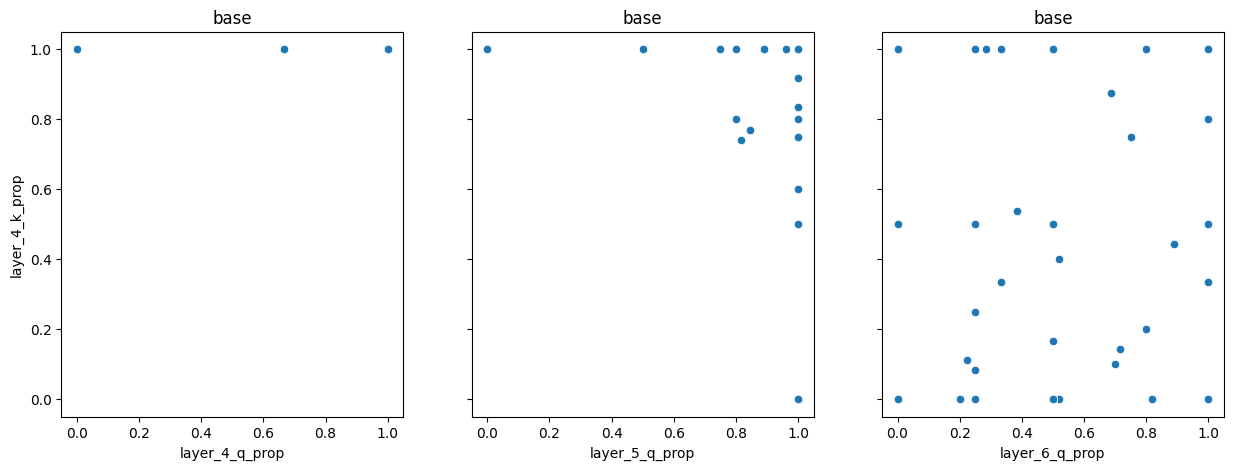

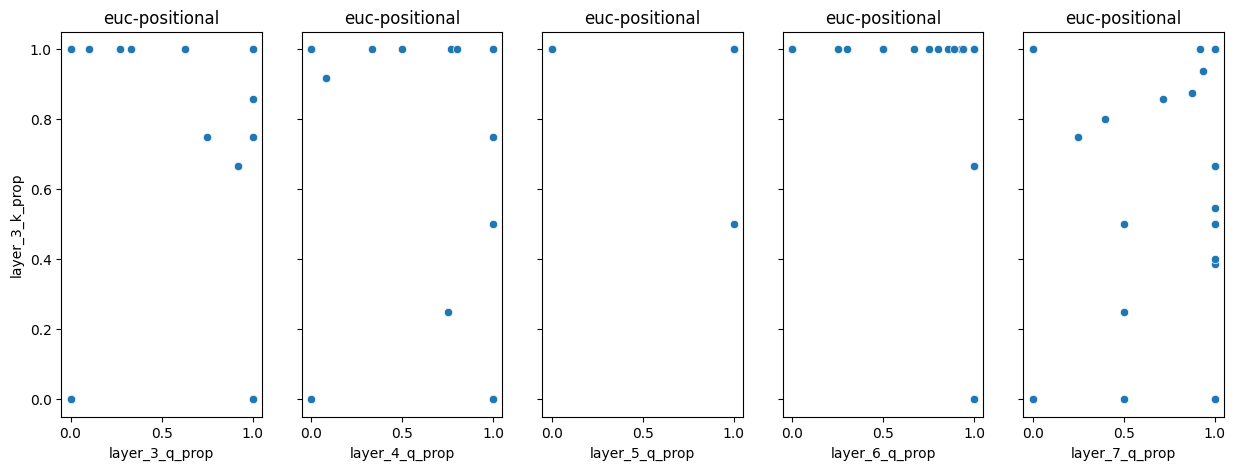

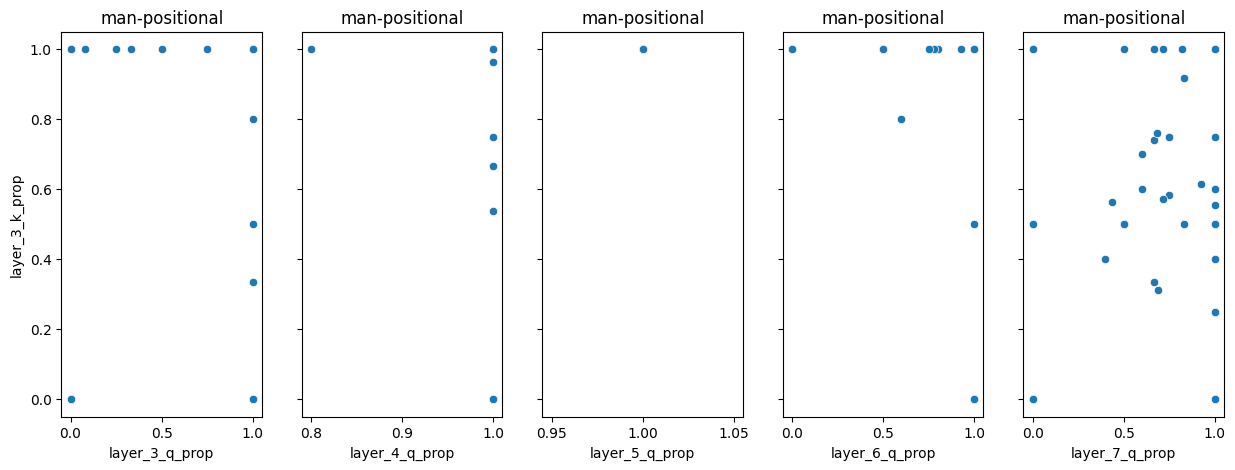

In [10]:
# Is there a relationship between the vertex proportion in the Q/K hulls?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('q_prop')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, q_col in enumerate(active_cols):
        k_col = q_col.replace("q", "k")
        sns.scatterplot(x=hull_stats[exp][q_col], y=hull_stats[exp][k_col], ax=ax[i])
        ax[i].set_title(exp)

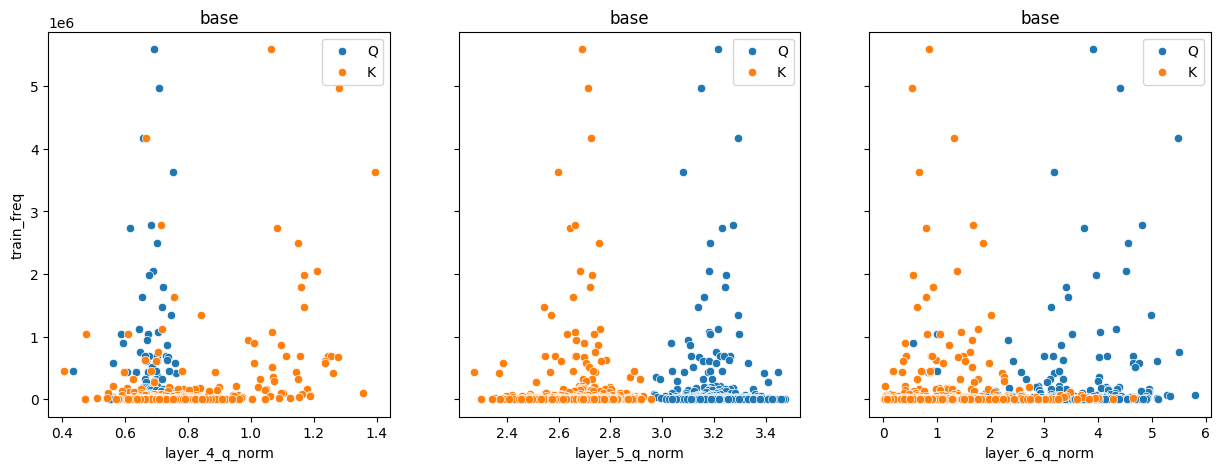

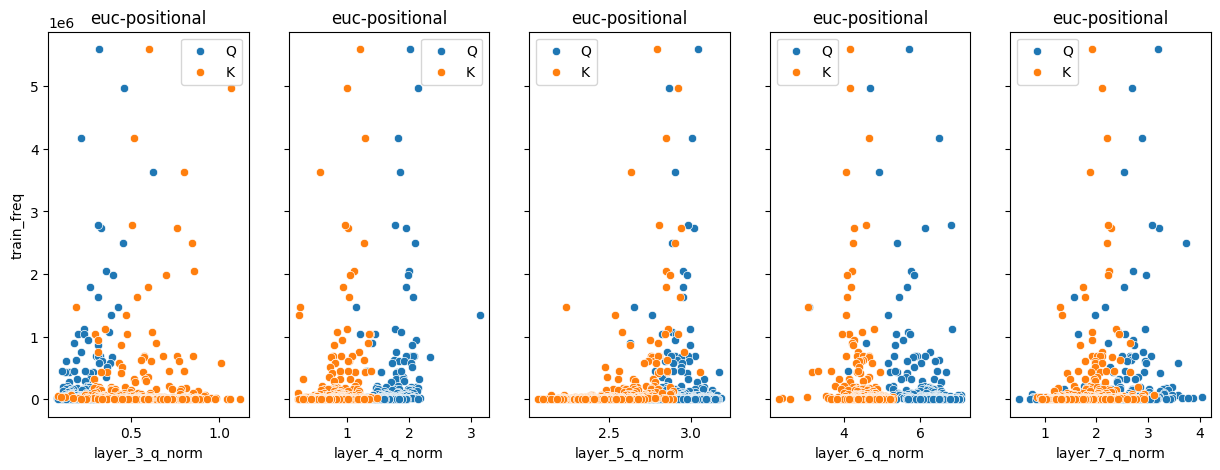

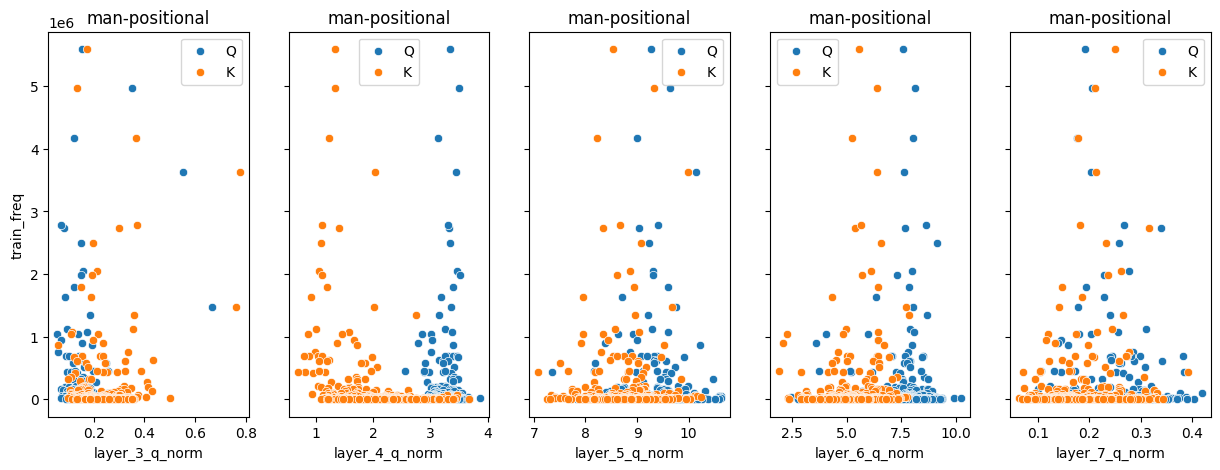

In [11]:
# Is there a relationship between the training frequency and norm of an embedding in the Q/K hulls?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('q_norm')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, q_col in enumerate(active_cols):
        k_col = q_col.replace("q", "k")
        sns.scatterplot(x=hull_stats[exp][q_col], y=hull_stats[exp]['train_freq'], ax=ax[i], label='Q')
        sns.scatterplot(x=hull_stats[exp][k_col], y=hull_stats[exp]['train_freq'], ax=ax[i], label='K')
        ax[i].set_title(exp)

In [20]:
# Do any columns have a strong correlation with validation loss?
for exp in hull_stats:
    print(exp)
    print(hull_stats[exp].corrwith(loss_stats[exp]['avg_loss']).abs().sort_values(ascending=False).head(5))
    print()

base
token_id              0.442168
layer_4_k_norm_var    0.439790
layer_5_q_and_k       0.429447
layer_4_q_norm_var    0.429149
layer_4_k_count       0.420087
dtype: float64

euc-positional
layer_5_k_norm        0.589345
token_id              0.510192
layer_5_k_norm_var    0.508214
layer_5_q_and_k       0.463769
layer_6_q_count       0.462425
dtype: float64

man-positional
token_id           0.619860
layer_4_k_norm     0.476722
layer_5_q_count    0.401714
layer_5_k_count    0.401714
layer_3_q_count    0.401714
dtype: float64



**Analysis:** Compared to the `n_heads_32` experiments, there exist columns with higher magnitudes of correlation. This might reflect the differentiation that higher-dimensional spaces allow a model to represent.

# KHull Statistics

## `n_heads_32`

In [2]:
# Load Loss Statistics From Disk
train_freqs = torch.load('./data/wikitext-103/unigram-token-counts.pt')

EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_32')
hull_stats = {}
loss_stats = {}

for path in EXPERIMENT_DIR.glob('*/khull-stats-*.csv'):
    hull_stats[path.parts[-2]] = pd.read_csv(path)
    hull_stats[path.parts[-2]]['train_freq'] = train_freqs

for path in EXPERIMENT_DIR.glob('*/val-loss-stats.csv'):
    loss_stats[path.parts[-2]] = pd.read_csv(path)

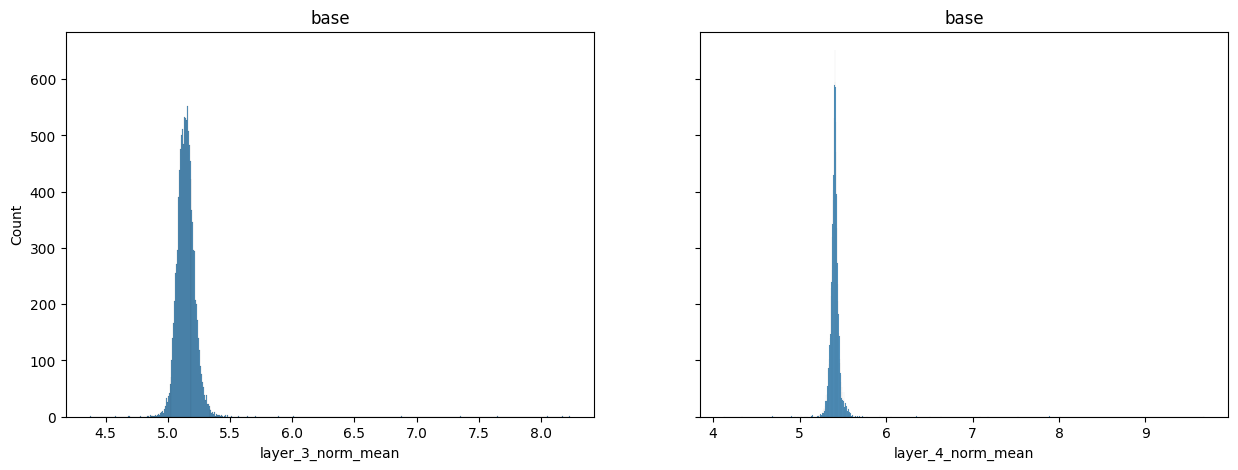

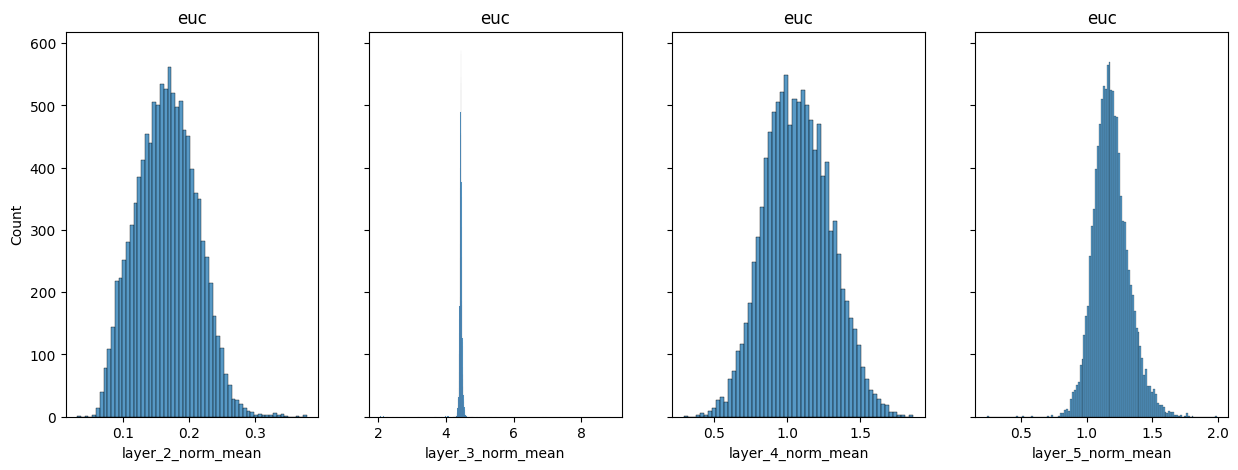

In [4]:
# What is the distribution of embedding norms for the K matrices?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('norm_mean')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.histplot(x=hull_stats[exp][col], ax=ax[i])
        ax[i].set_title(exp)

**Analysis:** Here, I'm plotting the distribution of the mean of tokens' embeddings in the first head of each layer. Due to layer normalization, I expect to see the distribution of means be centered around a relatively small value. Interestingly, both of the active layers in the `base` model have large embeddings that are tightly distributed. The third layer of the `euc` model also displays this property. Otherwise, my hypothesis is correct for the remaining `euc` layers. I wonder if there's something about the learning process that caused layer 3 to be large for both models. Regardless, when the distribution is centered aroung a high value, it seems to be very tightly distributed around it. 

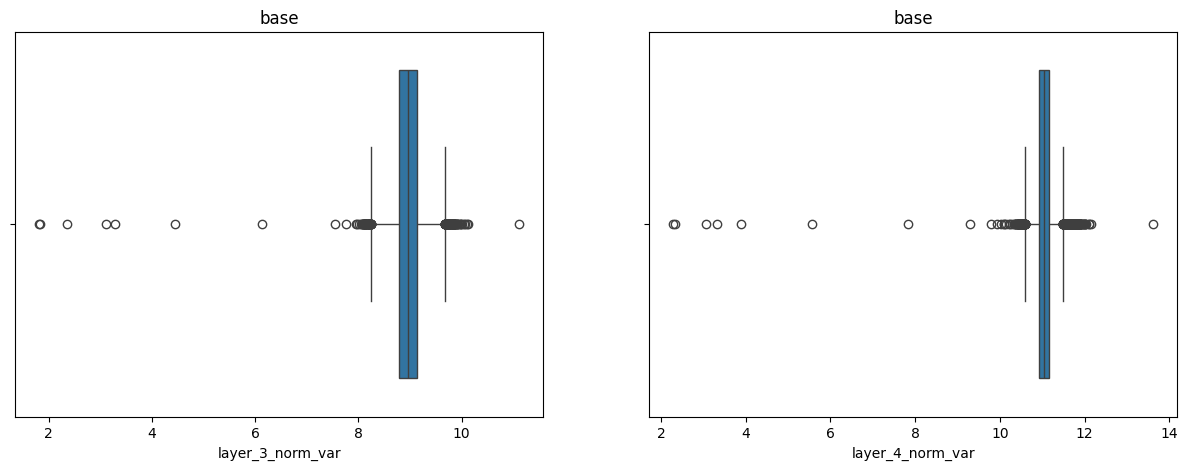

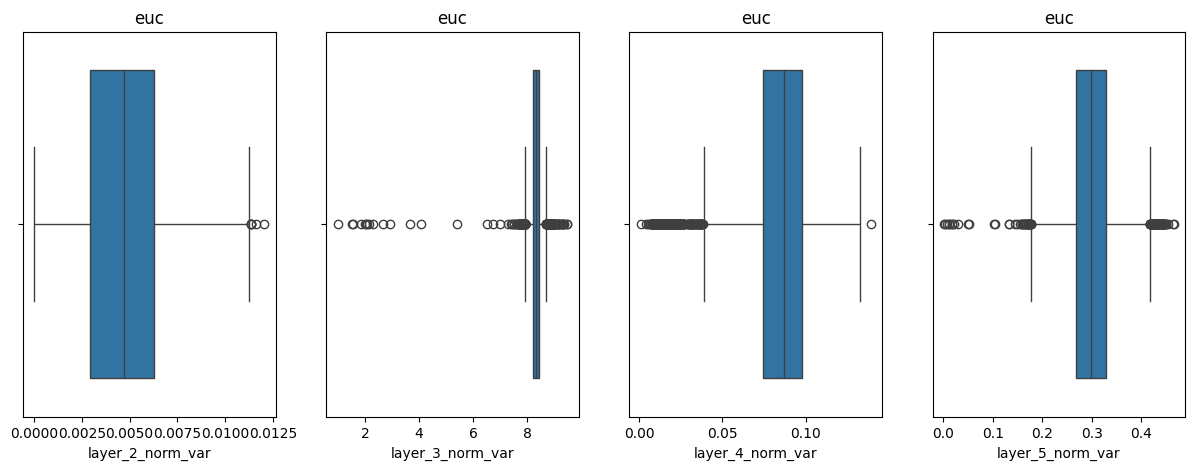

In [6]:
# What is the variance of embeddings in each layer?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('norm_var')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.boxplot(x=hull_stats[exp][col], ax=ax[i])
        ax[i].set_title(exp)

**Analysis:** Data was collected for each token in every validation batch as the window slides. Thus, as far as I know, the only thing that should change an embedding's norm as it changes position throughout the sequence is the positional encoding applied to it. As such, I expect to see fairly low variances in each of the heads. This appears to be true for the majority of the `euc` model's heads. However, the `base` layers (and layer 3 of `euc`) display the opposite. This coincides with the mean analysis done in the plot above. I wonder why the embeddings for a token have a much larger variance when they are in different positions of the sequence in these heads. Perhaps the role of these heads is to differentiate between tokens' positions as opposed to semantic differences?

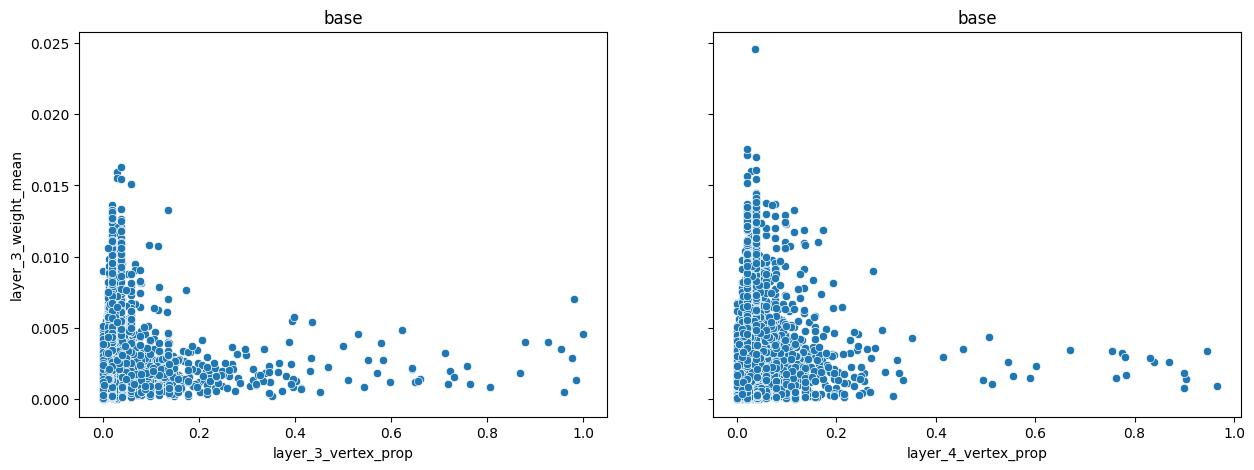

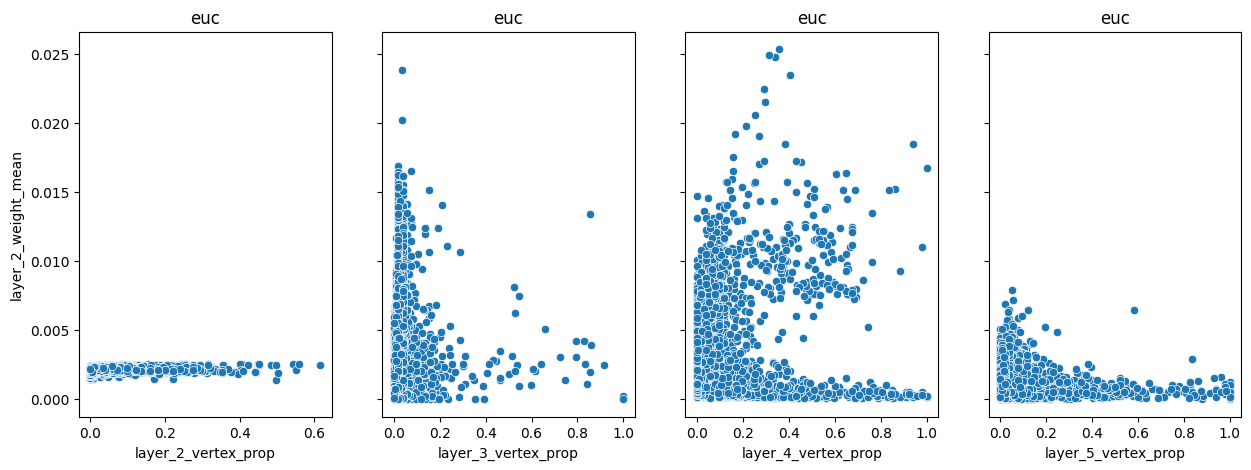

In [9]:
# Is there a relationship between the maximum weight assigned to a token vs. its vertex proportion?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('vertex_prop')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        weight_col = col.replace('vertex_prop', 'weight_mean')
        sns.scatterplot(data=hull_stats[exp], x=col, y=weight_col, ax=ax[i])
        ax[i].set_title(exp)

## `n_heads_16`

In [2]:
# Load Loss Statistics From Disk
train_freqs = torch.load('./data/wikitext-103/unigram-token-counts.pt')

EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_16')
hull_stats = {}
loss_stats = {}

for path in EXPERIMENT_DIR.glob('*/khull-stats-*.csv'):
    hull_stats[path.parts[-2]] = pd.read_csv(path)
    hull_stats[path.parts[-2]]['train_freq'] = train_freqs

for path in EXPERIMENT_DIR.glob('*/val-loss-stats.csv'):
    loss_stats[path.parts[-2]] = pd.read_csv(path)

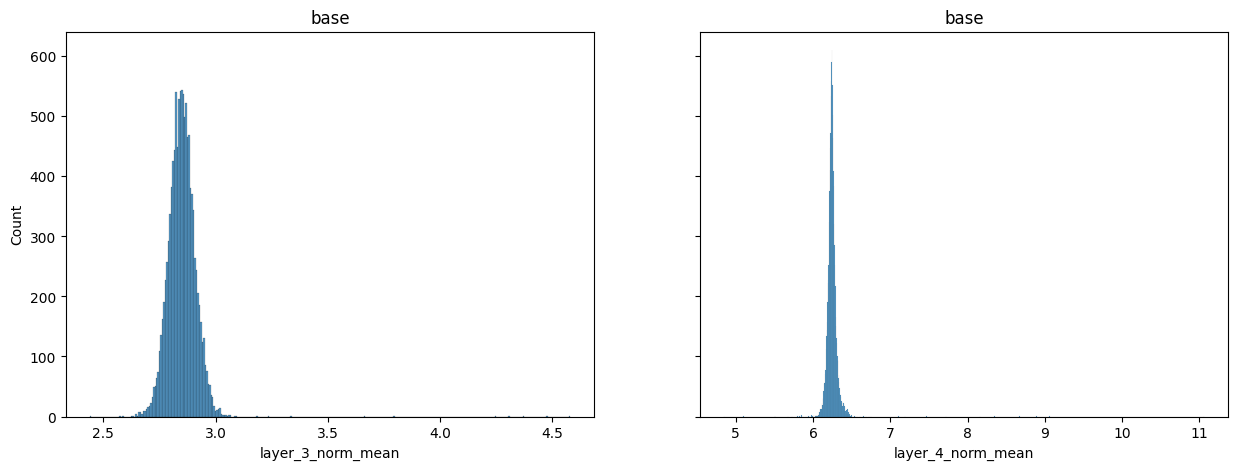

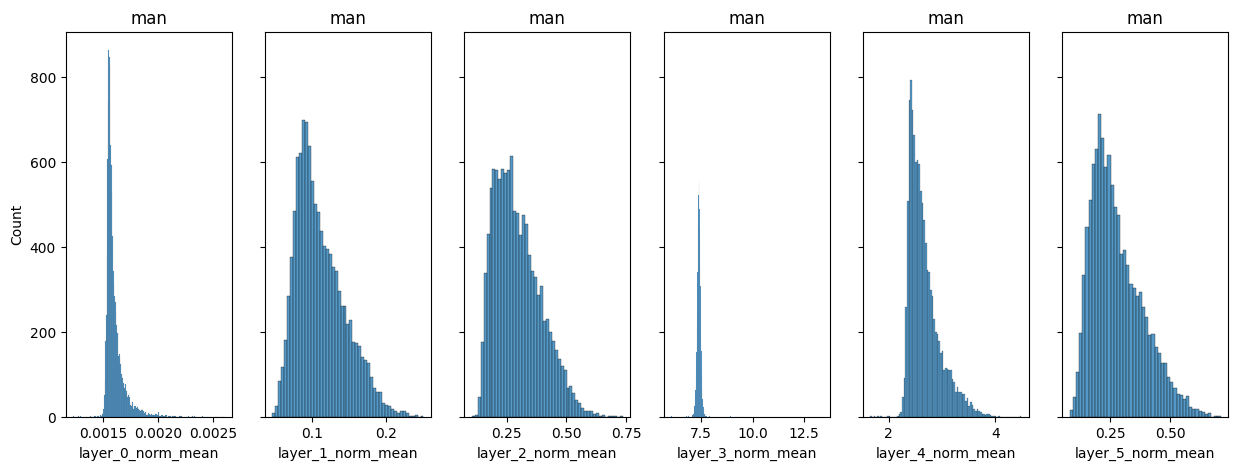

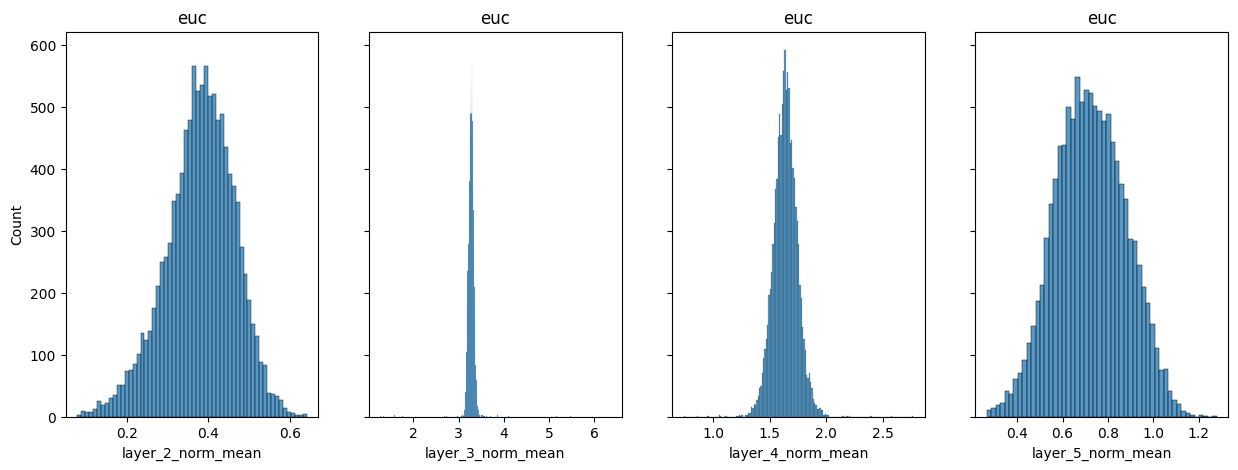

In [11]:
# What is the distribution of embedding norms for the K matrices?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('norm_mean')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.histplot(x=hull_stats[exp][col], ax=ax[i])
        ax[i].set_title(exp)

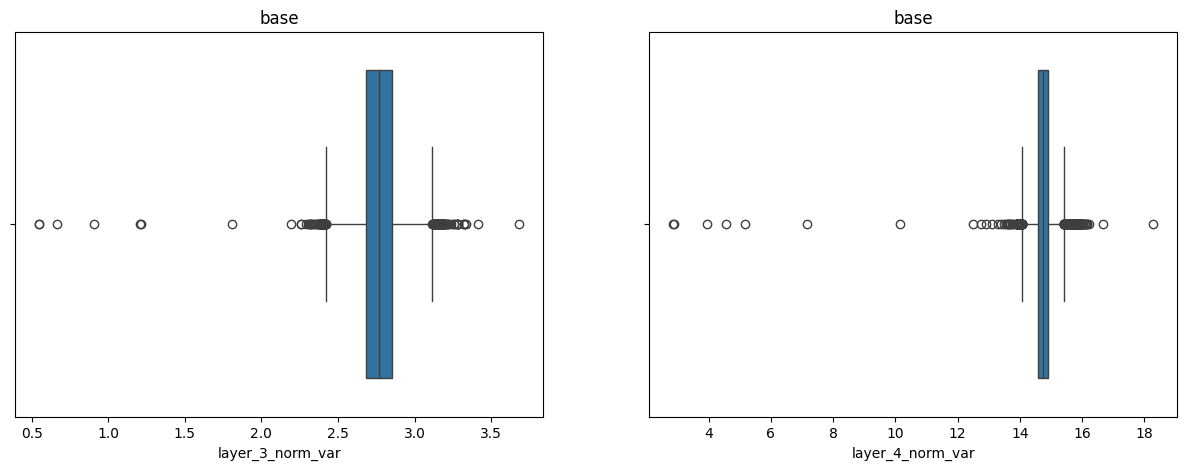

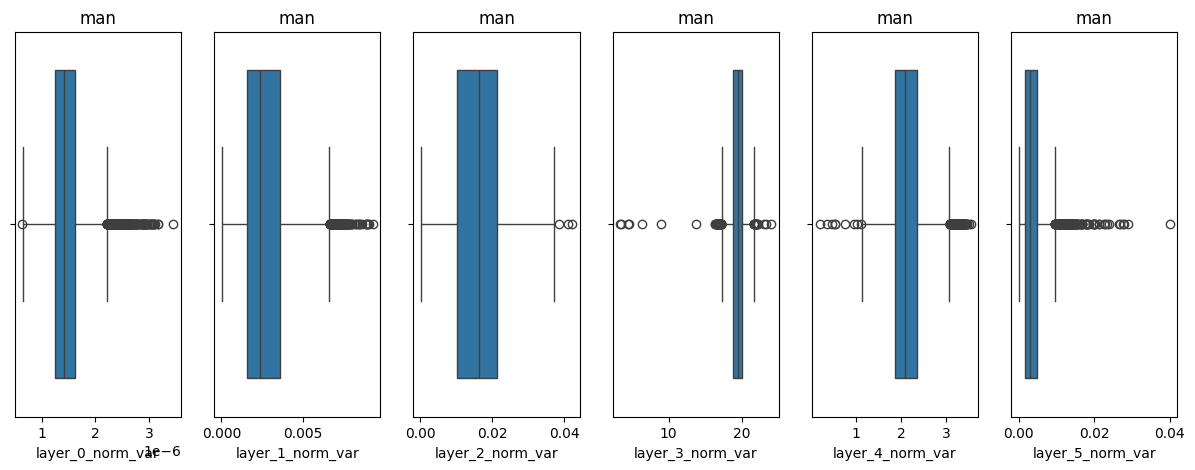

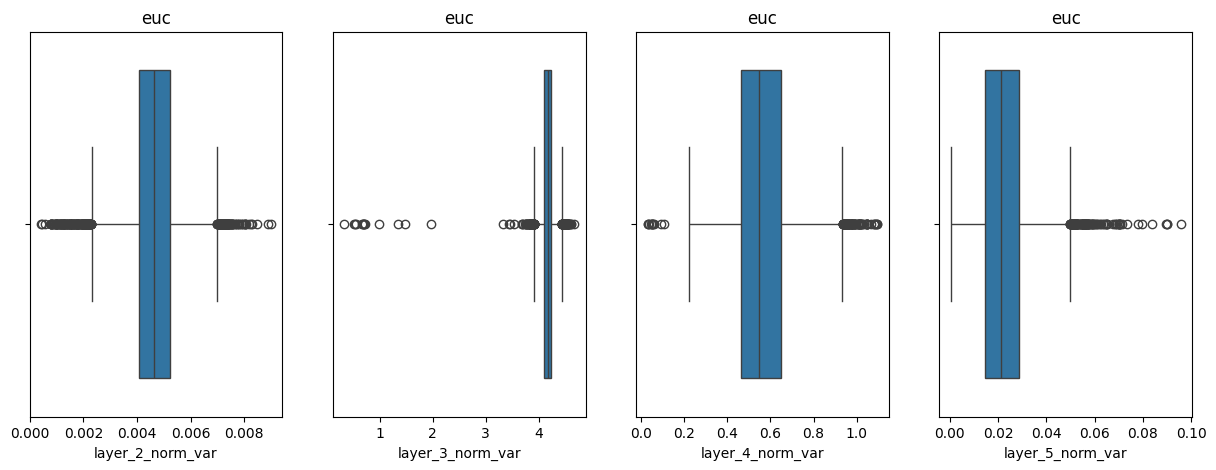

In [12]:
# What is the variance of embeddings in each layer?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('norm_var')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.boxplot(x=hull_stats[exp][col], ax=ax[i])
        ax[i].set_title(exp)

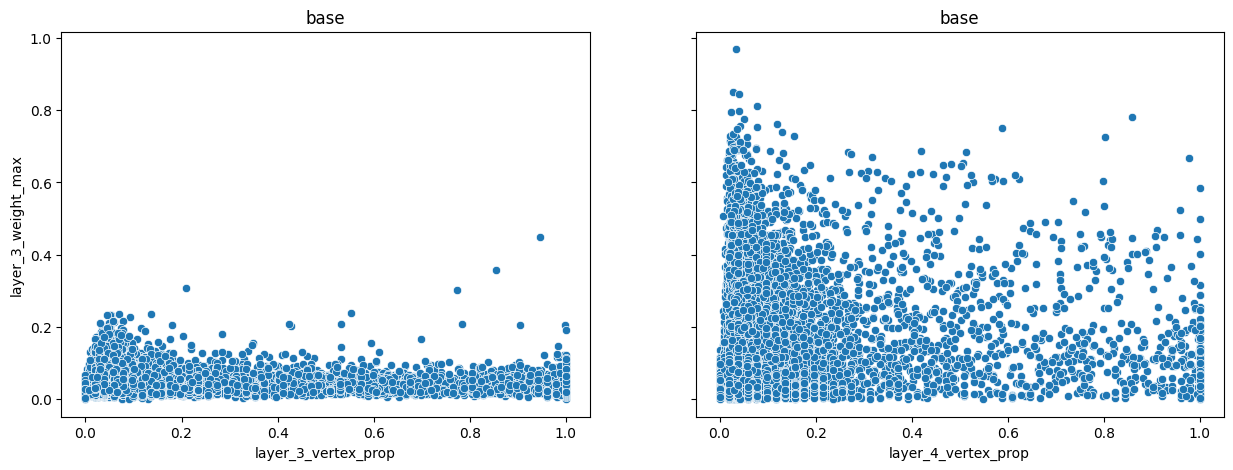

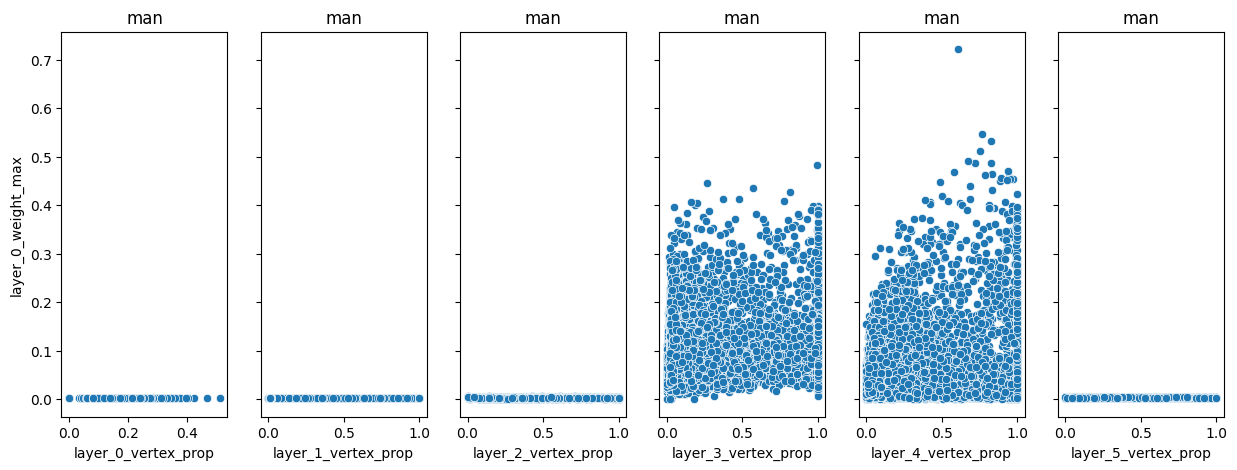

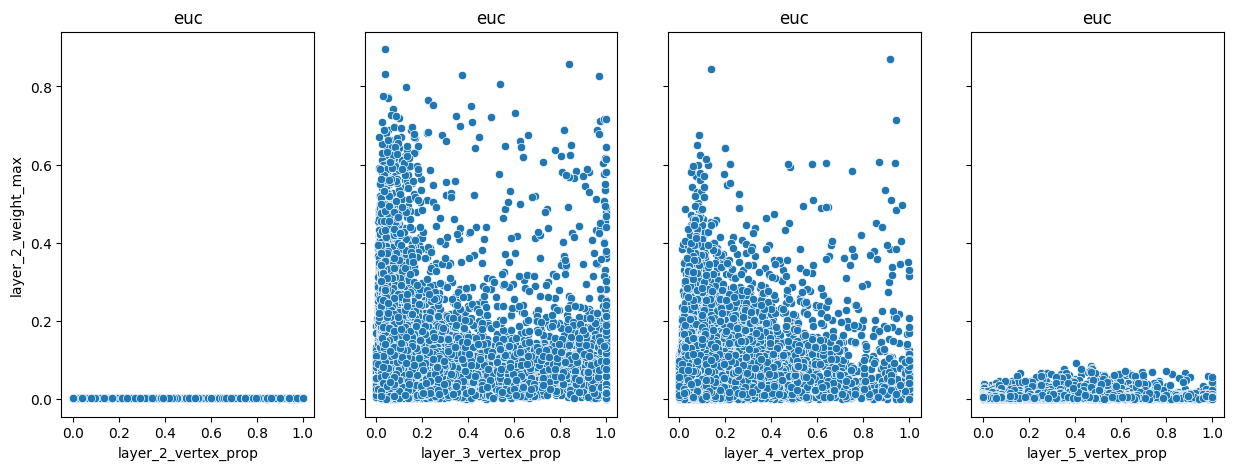

In [17]:
# Is there a relationship between the maximum weight assigned to a token vs. its vertex proportion?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('vertex_prop')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        weight_col = col.replace('vertex_prop', 'weight_max')
        sns.scatterplot(data=hull_stats[exp], x=col, y=weight_col, ax=ax[i])
        ax[i].set_title(exp)

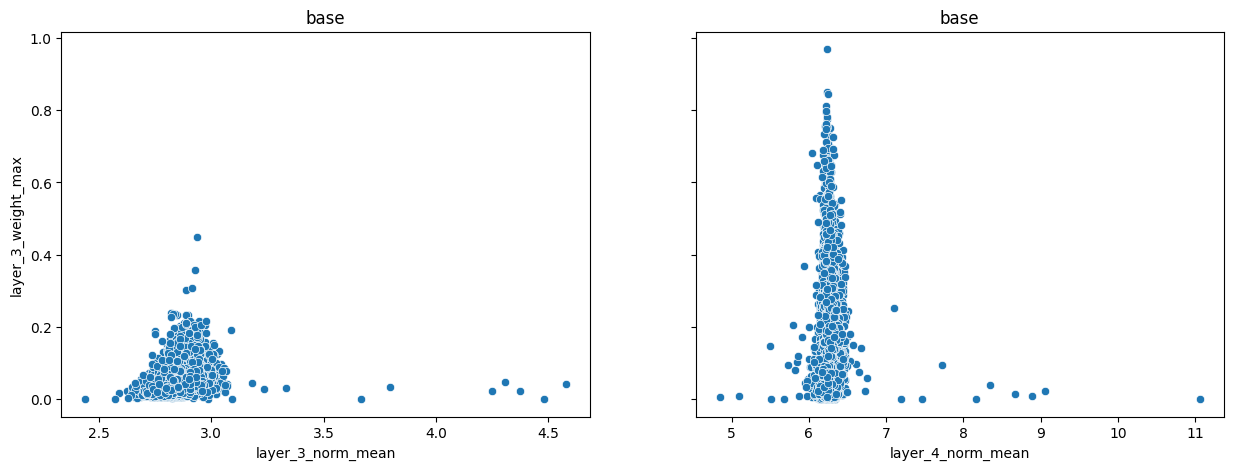

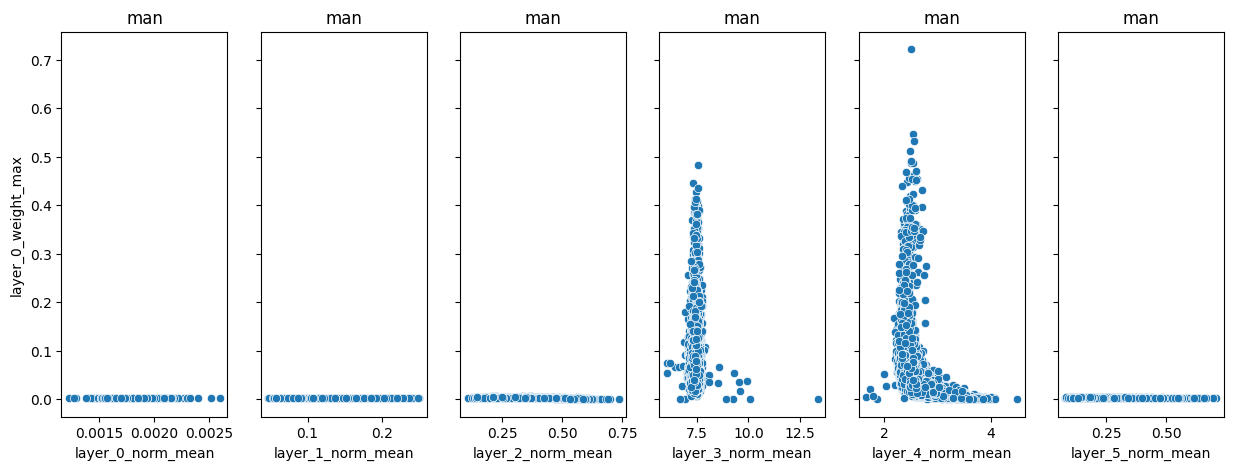

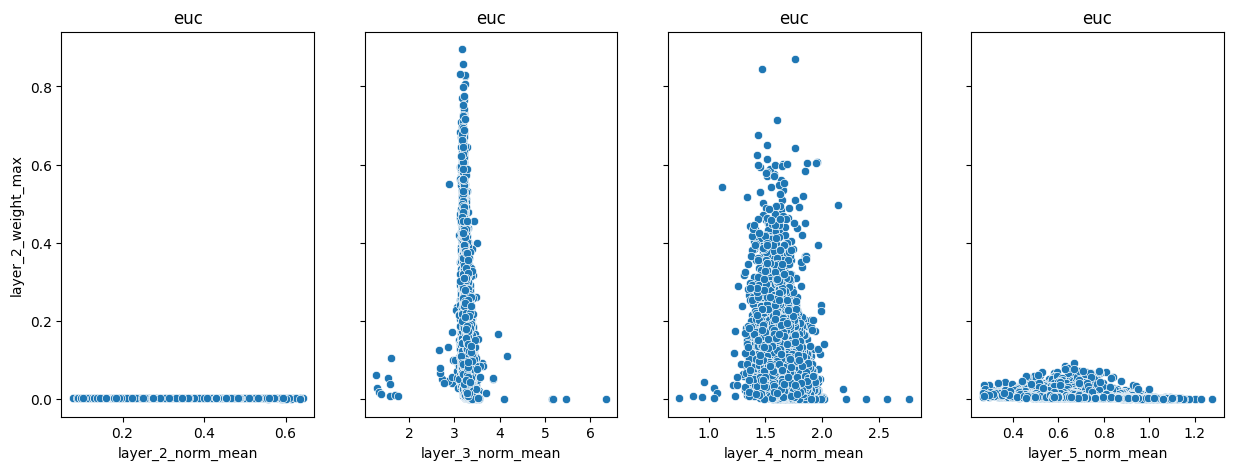

In [14]:
# Is there a relationship between the maximum weight assigned to a token vs. its embedding norm?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('norm_mean')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        weight_col = col.replace('norm_mean', 'weight_max')
        sns.scatterplot(data=hull_stats[exp], x=col, y=weight_col, ax=ax[i])
        ax[i].set_title(exp)

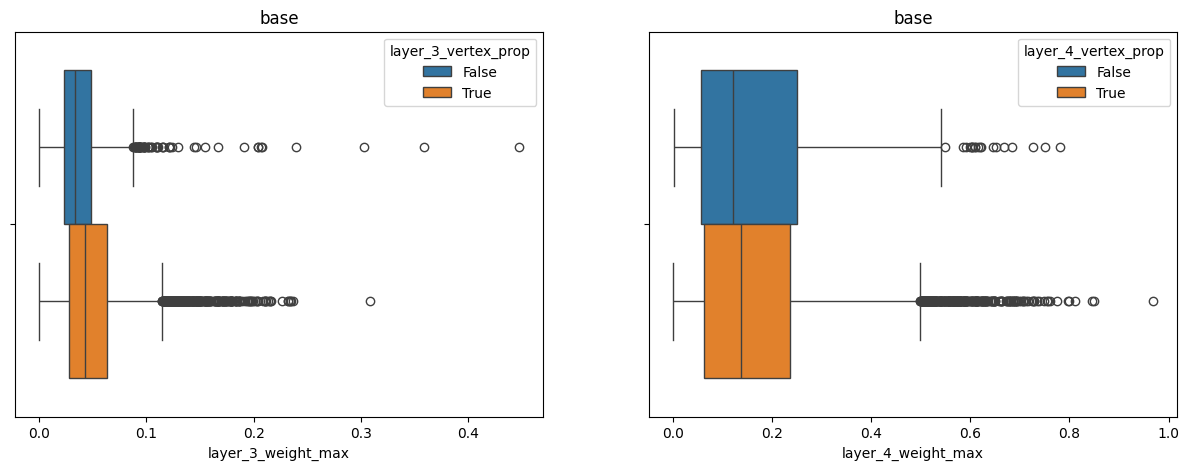

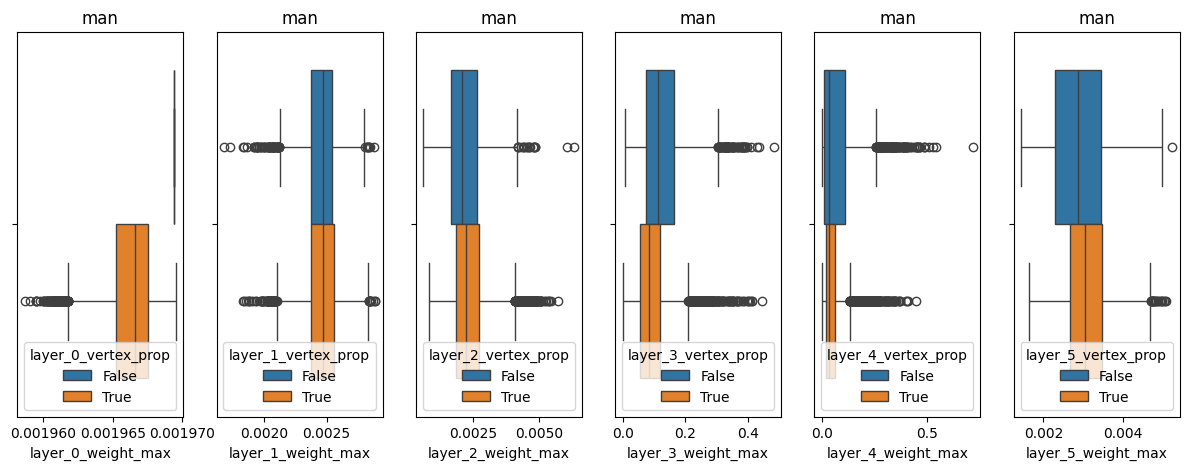

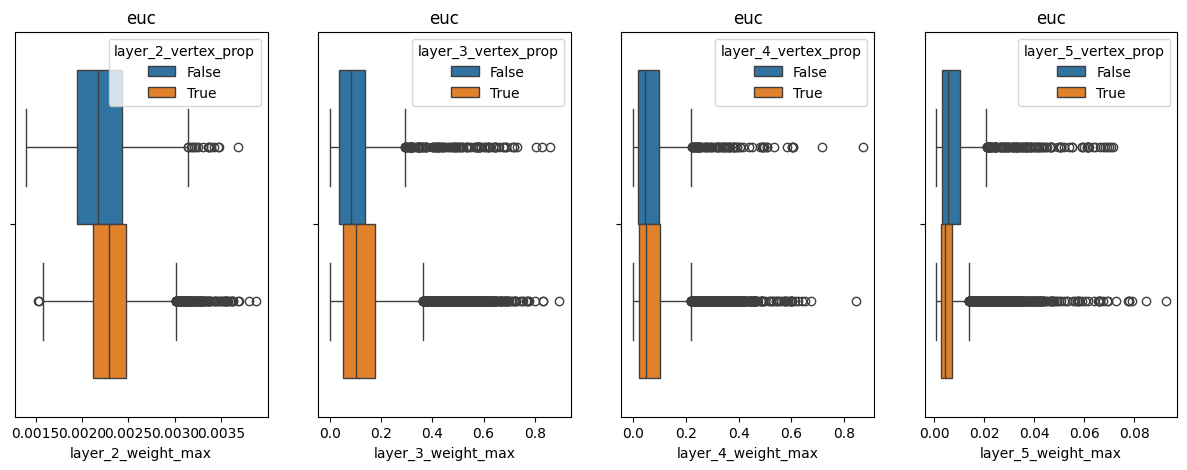

In [12]:
# NOTE: Using hull_stats['base']['layer_3_vertex_prop'].describe(), the 75% is 0.206. Thus, 75% of tokens
#       are a vertex on the K hull less than 20% of the time. For the few tokens that have a large chance 
#       of occurring on the convex hull, what is the distribution of maximum weight assigned? 
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('norm_mean')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        weight_col = col.replace('norm_mean', 'weight_max')
        prop_col = col.replace('norm_mean', 'vertex_prop')
        sns.boxplot(
            x=hull_stats[exp][weight_col], 
            hue=hull_stats[exp][prop_col] < 0.5, 
            ax=ax[i]
        )
        ax[i].set_title(exp)

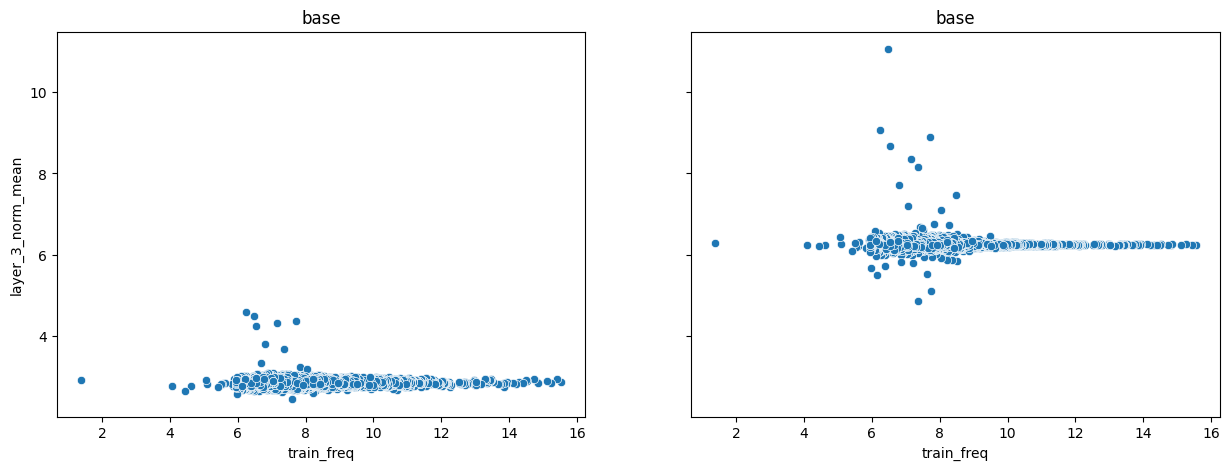

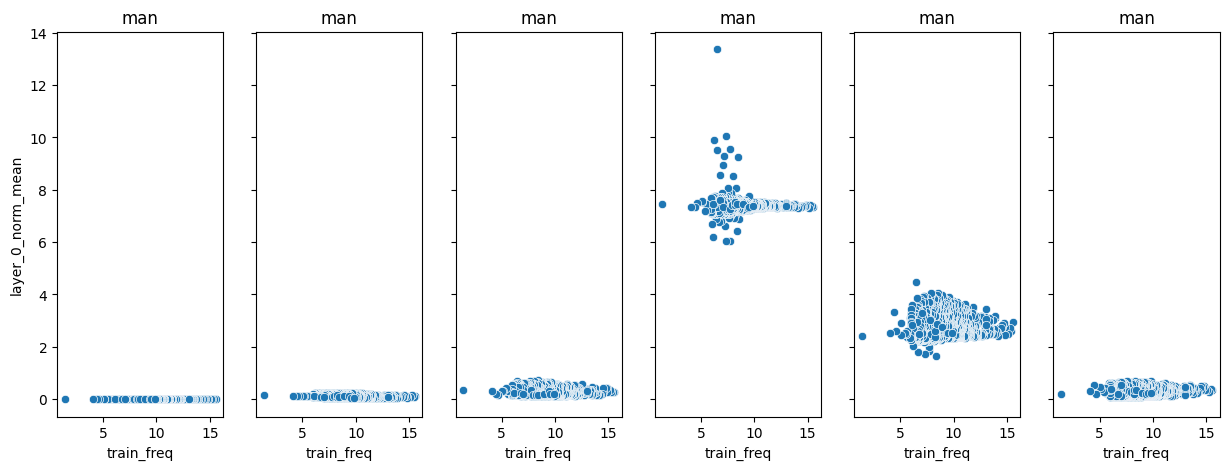

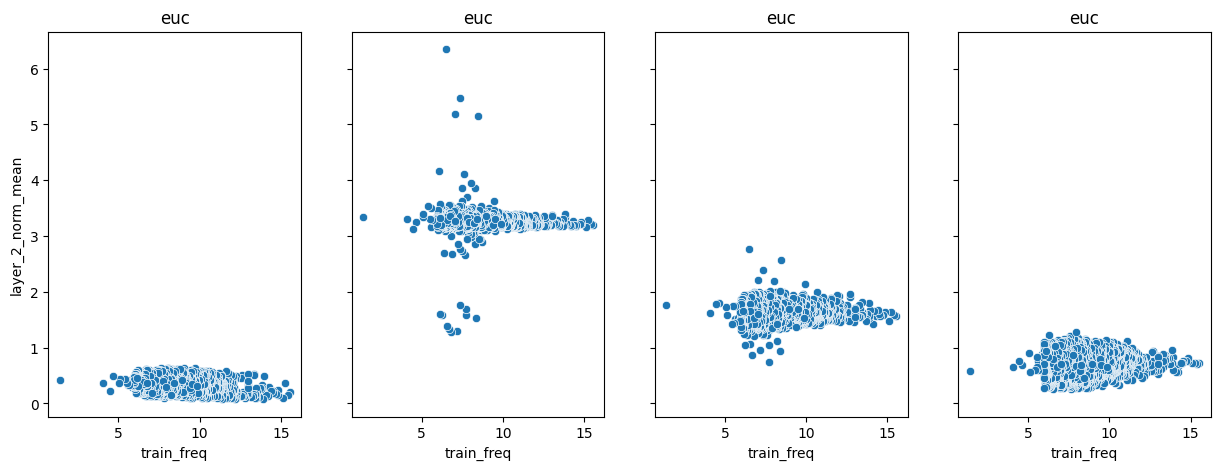

In [4]:
# Is there a relationship between training frequency and the embedding norm of a token inside an attention head?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('norm_mean')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.scatterplot(
            x=np.log(hull_stats[exp]['train_freq'] + 1), 
            y=hull_stats[exp][col],
            ax=ax[i]
        )
        ax[i].set_title(exp)

**Analysis:** There doesn't seem to be a useful relationship here. If anything, the most popular tokens have the most centered embedding norms. This is different than what was found in stolen probability, where high frequency was associated with a large norm. 

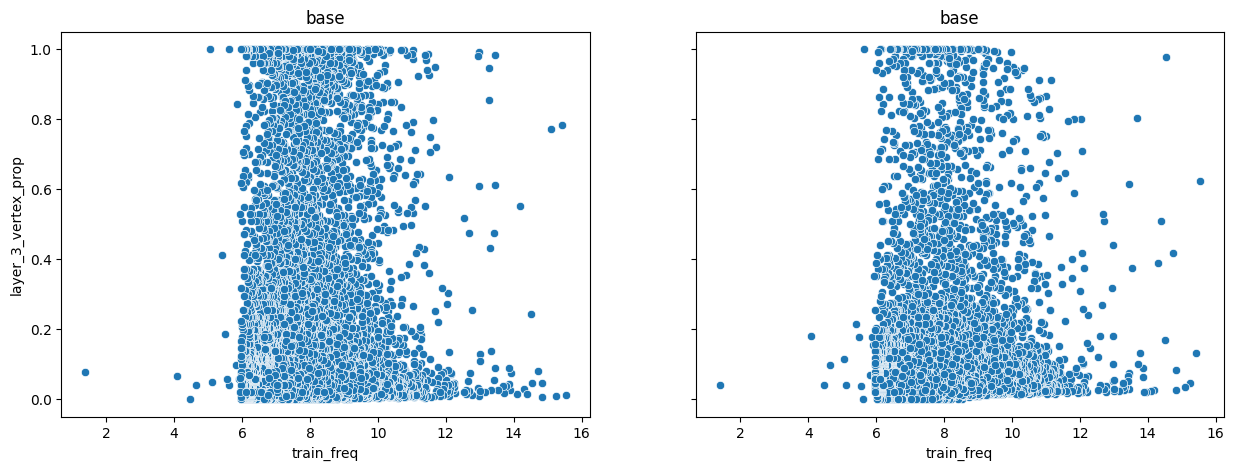

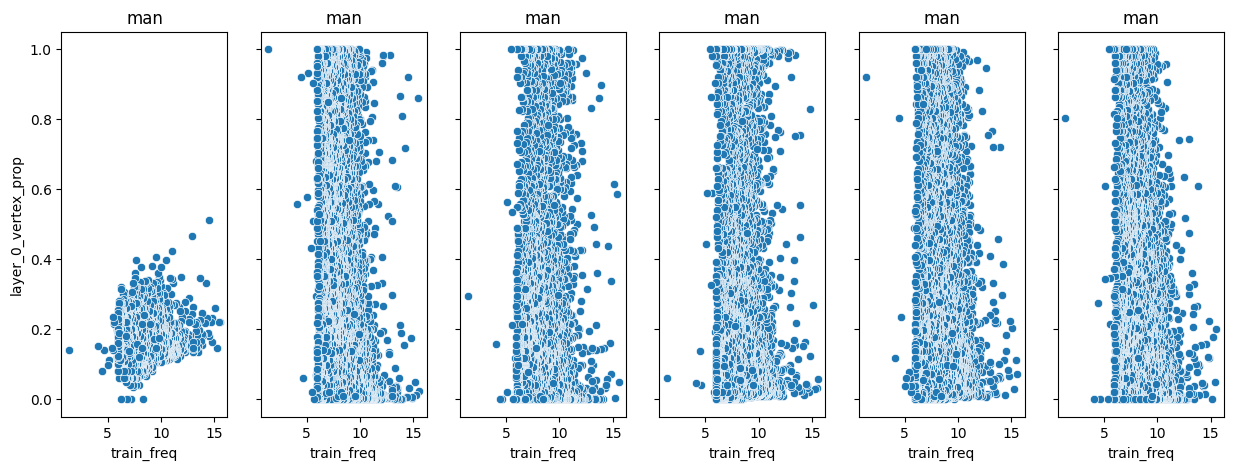

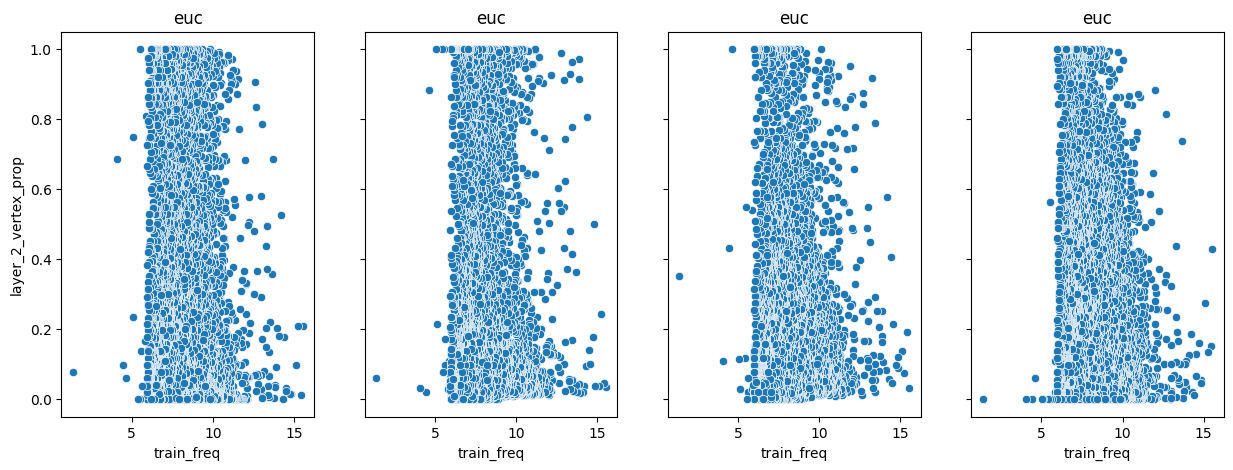

In [23]:
# Is there a relationship between training frequency and the vertex proportion of a token inside an attention head?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('vertex_prop')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.scatterplot(
            x=np.log(hull_stats[exp]['train_freq'] + 1), 
            y=hull_stats[exp][col],
            ax=ax[i]
        )
        ax[i].set_title(exp)

**Analysis:** Again, there doesn't seem to be a useful relationship here.

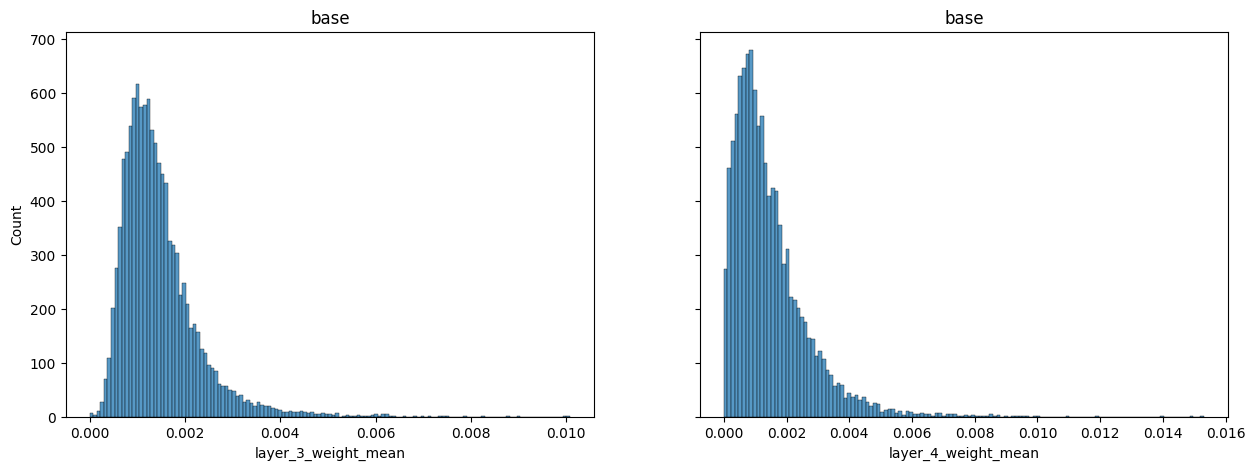

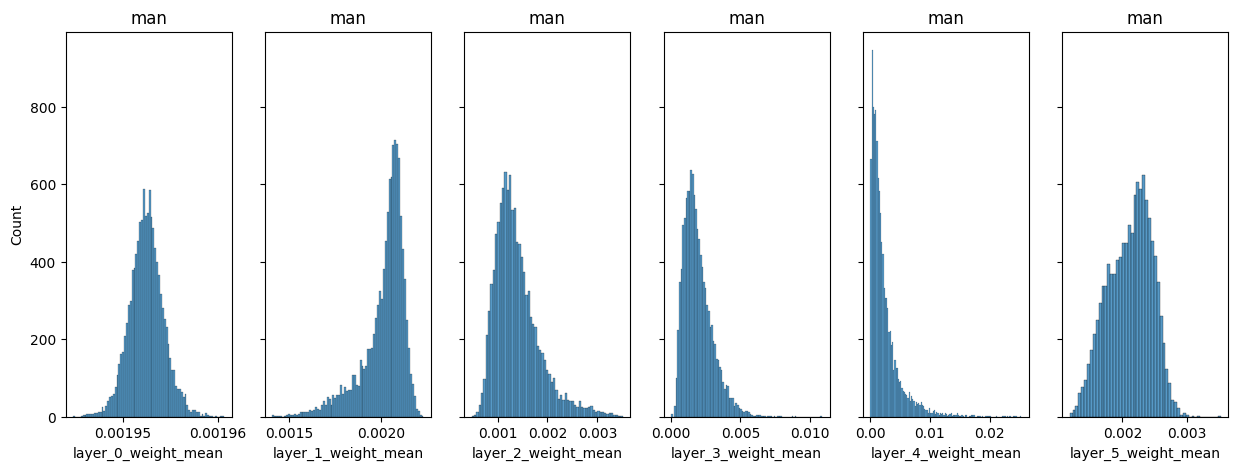

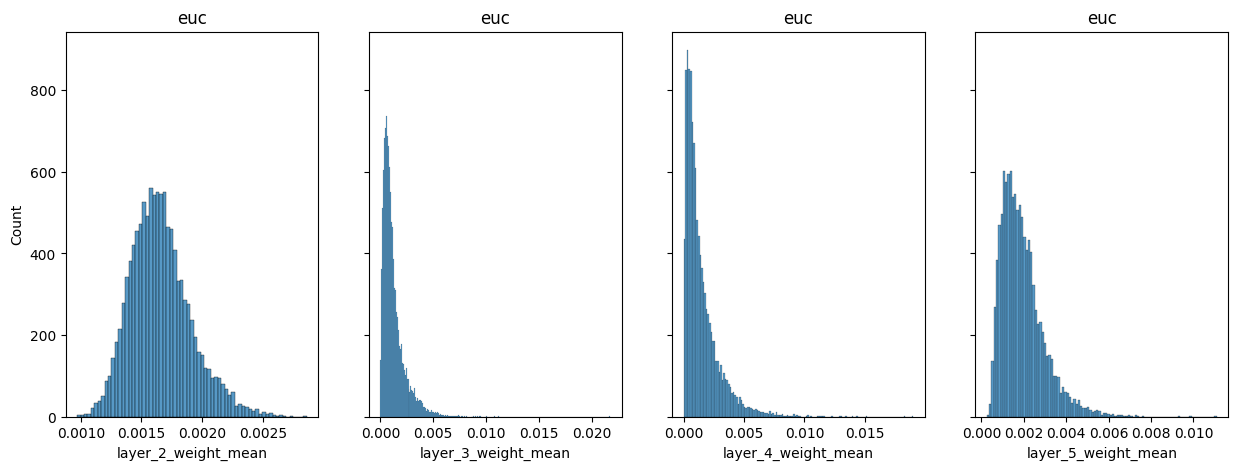

In [25]:
# What is the distribution of attention weights in each layer?
for exp in hull_stats:
    cols_to_plot = [col for col in hull_stats[exp].columns if col.endswith('weight_mean')]
    active_cols = [col for col in cols_to_plot if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.histplot(x=hull_stats[exp][col], ax=ax[i])
        ax[i].set_title(exp)

## `n_heads_8`

In [5]:
# Load Loss Statistics From Disk
train_freqs = torch.load('./data/wikitext-103/unigram-token-counts.pt')

EXPERIMENT_DIR = Path('./experiments/embed_dim_64/n_heads_8')
hull_stats = {}
loss_stats = {}

for path in EXPERIMENT_DIR.glob('*/khull-stats-*.csv'):
    hull_stats[path.parts[-2]] = pd.read_csv(path)
    hull_stats[path.parts[-2]]['train_freq'] = train_freqs

for path in EXPERIMENT_DIR.glob('*/val-loss-stats.csv'):
    loss_stats[path.parts[-2]] = pd.read_csv(path)

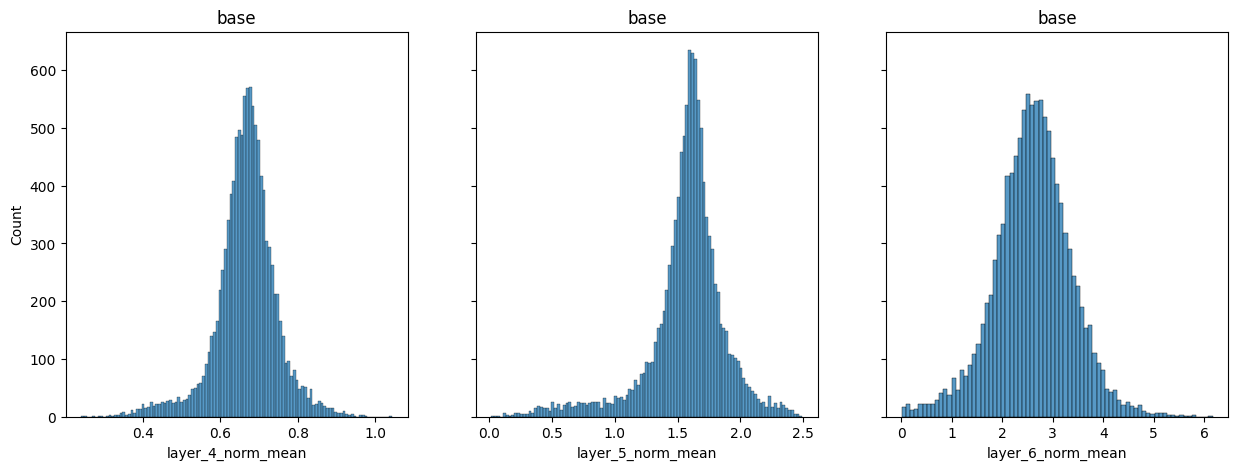

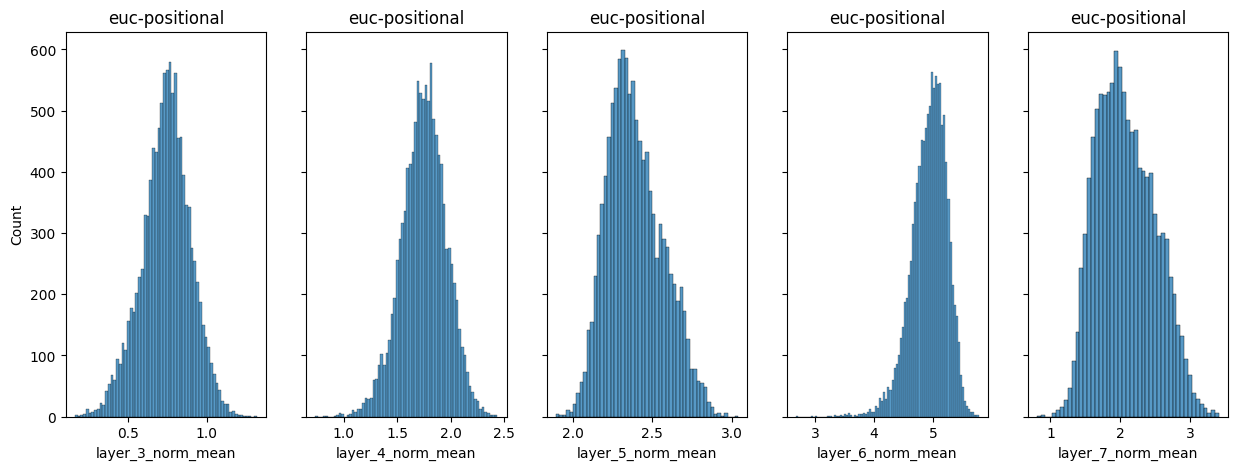

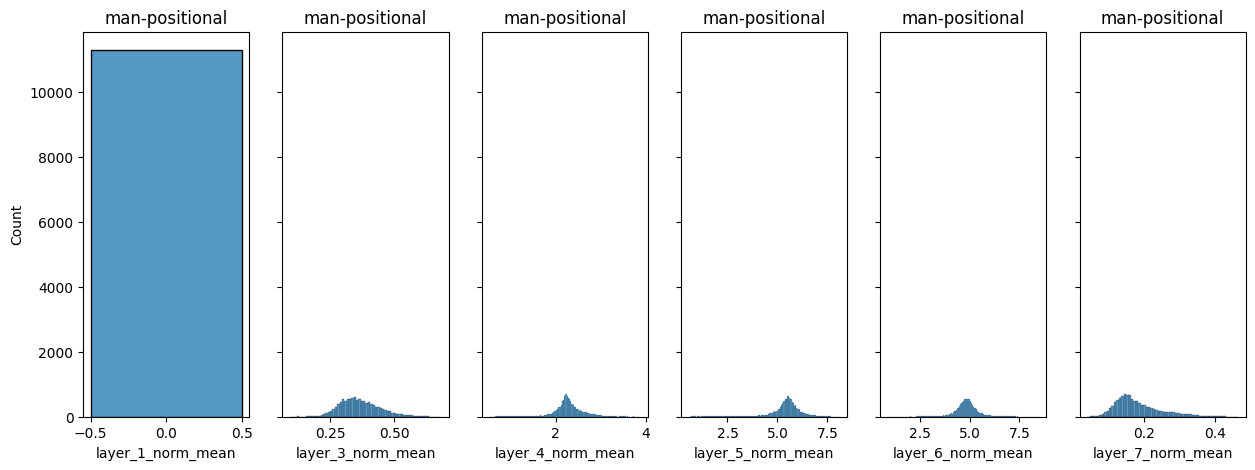

In [6]:
# What is the distribution of embedding norms for the K matrices?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('norm_mean')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.histplot(x=hull_stats[exp][col], ax=ax[i])
        ax[i].set_title(exp)

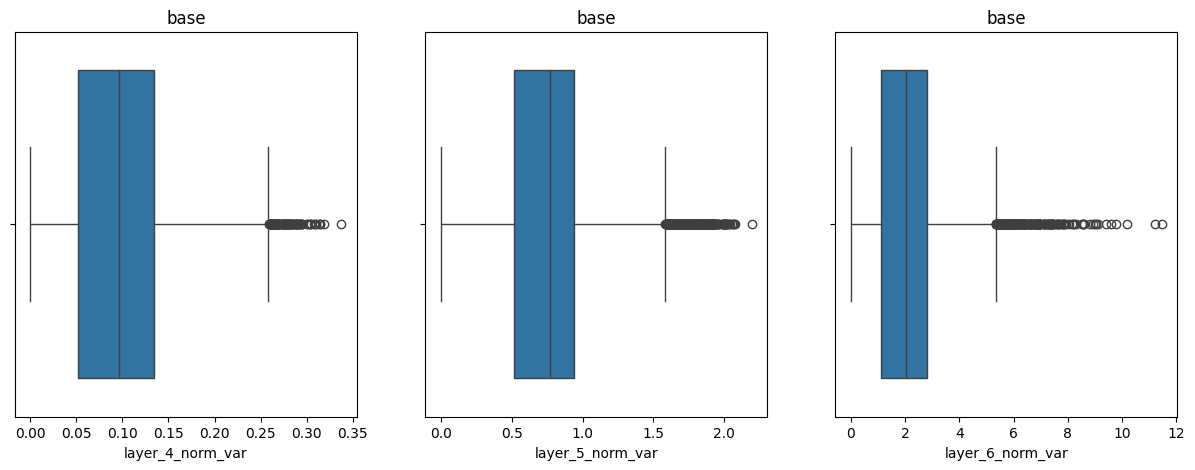

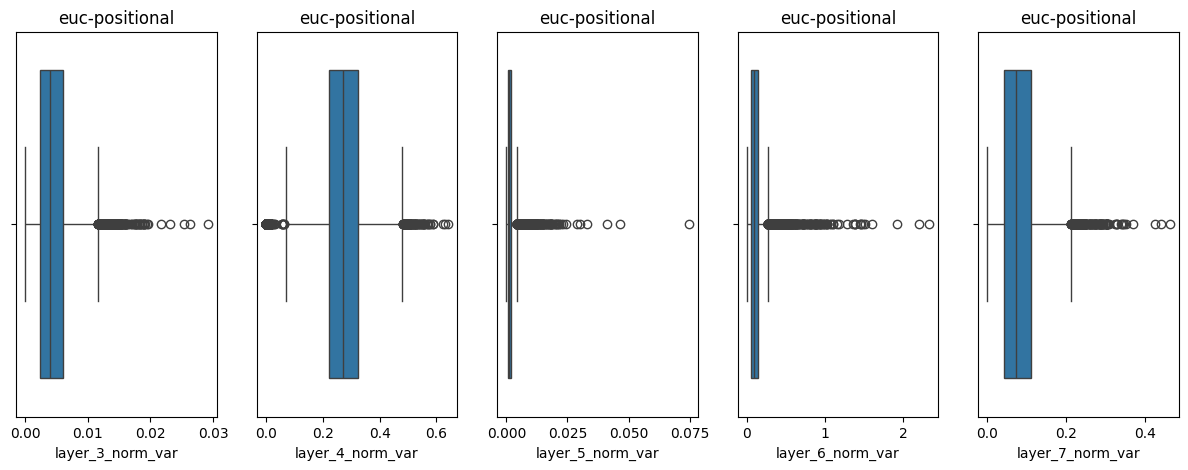

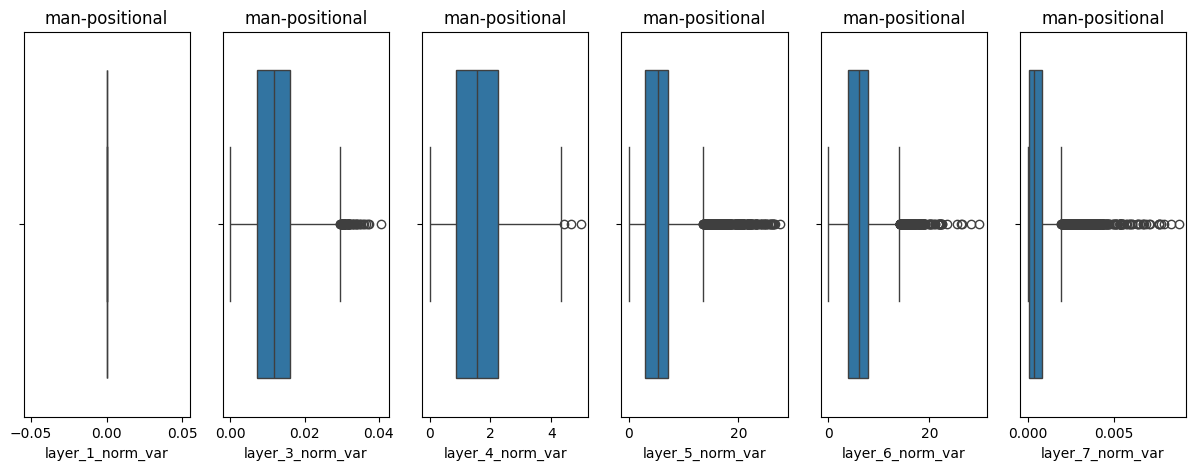

In [7]:
# What is the variance of embeddings in each layer?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('norm_var')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.boxplot(x=hull_stats[exp][col], ax=ax[i])
        ax[i].set_title(exp)

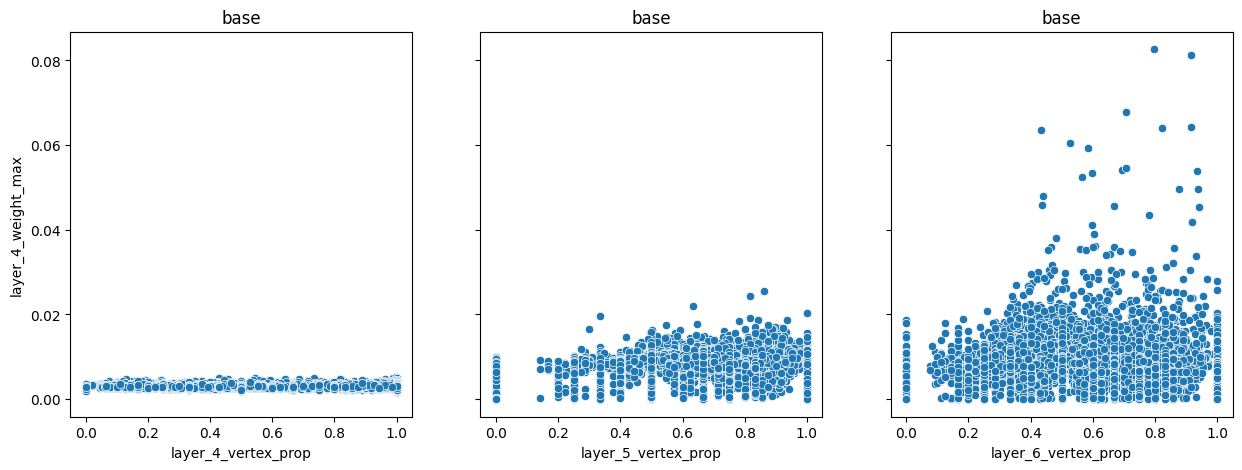

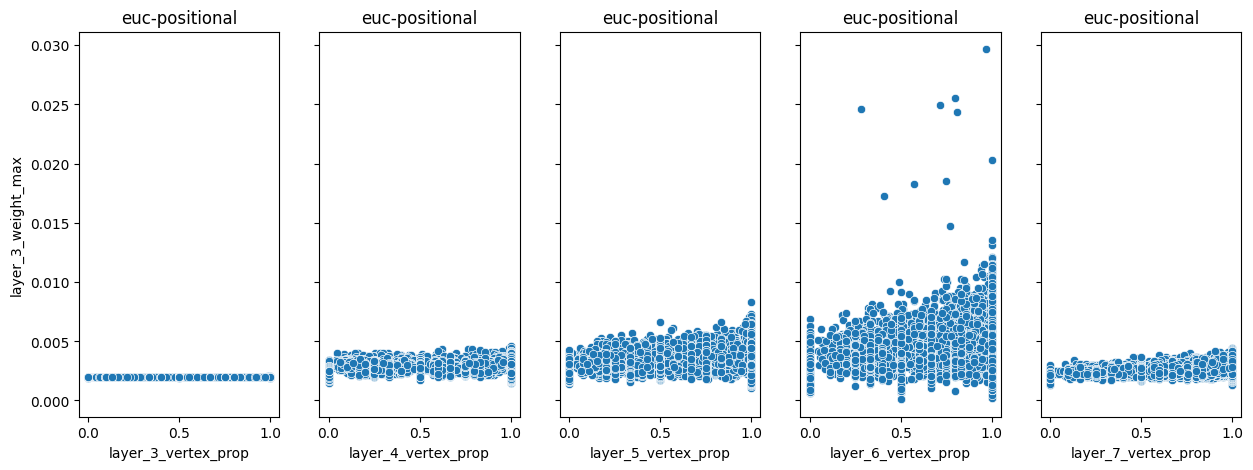

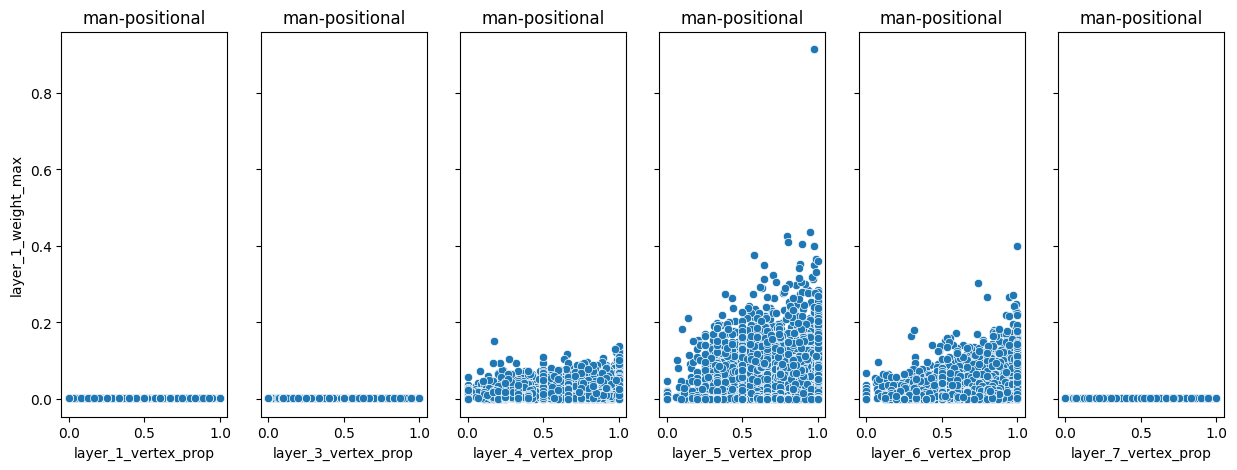

In [8]:
# Is there a relationship between the maximum weight assigned to a token vs. its vertex proportion?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('vertex_prop')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        weight_col = col.replace('vertex_prop', 'weight_max')
        sns.scatterplot(data=hull_stats[exp], x=col, y=weight_col, ax=ax[i])
        ax[i].set_title(exp)

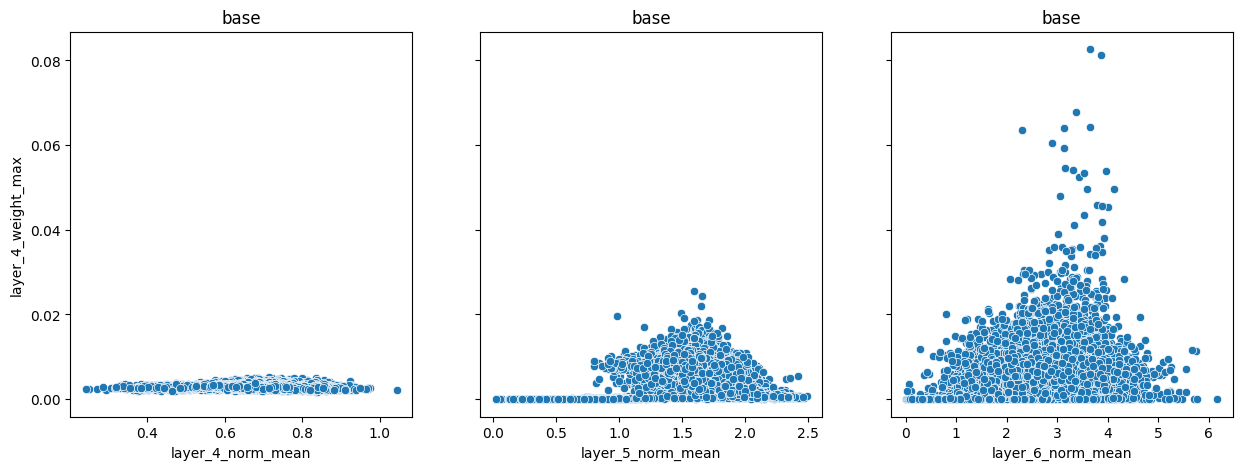

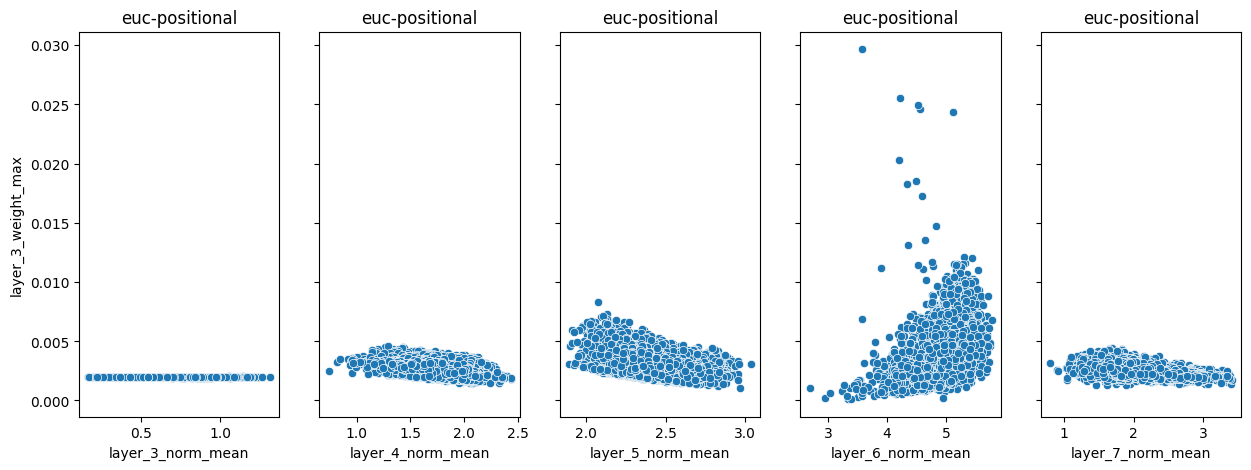

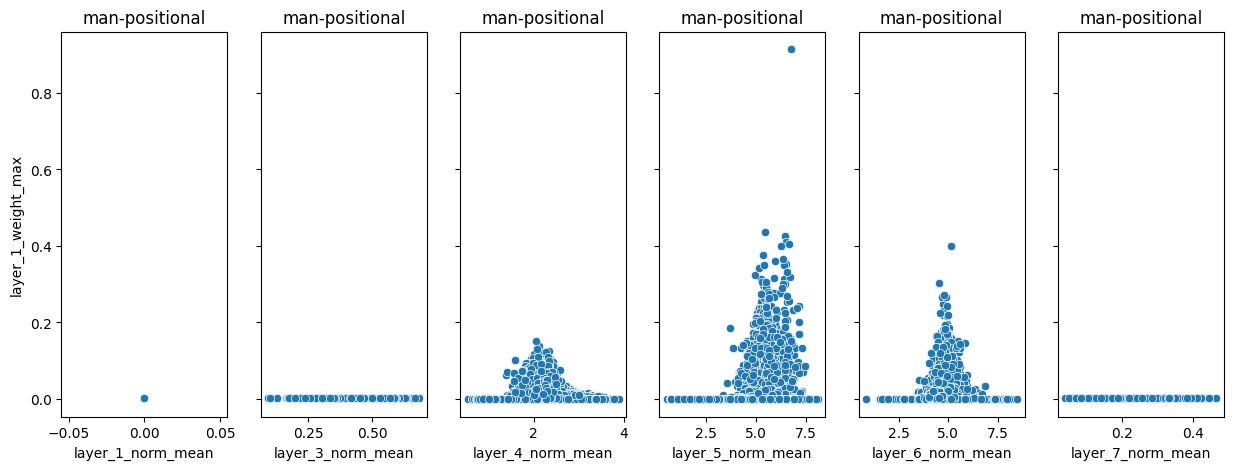

In [9]:
# Is there a relationship between the maximum weight assigned to a token vs. its embedding norm?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('norm_mean')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        weight_col = col.replace('norm_mean', 'weight_max')
        sns.scatterplot(data=hull_stats[exp], x=col, y=weight_col, ax=ax[i])
        ax[i].set_title(exp)

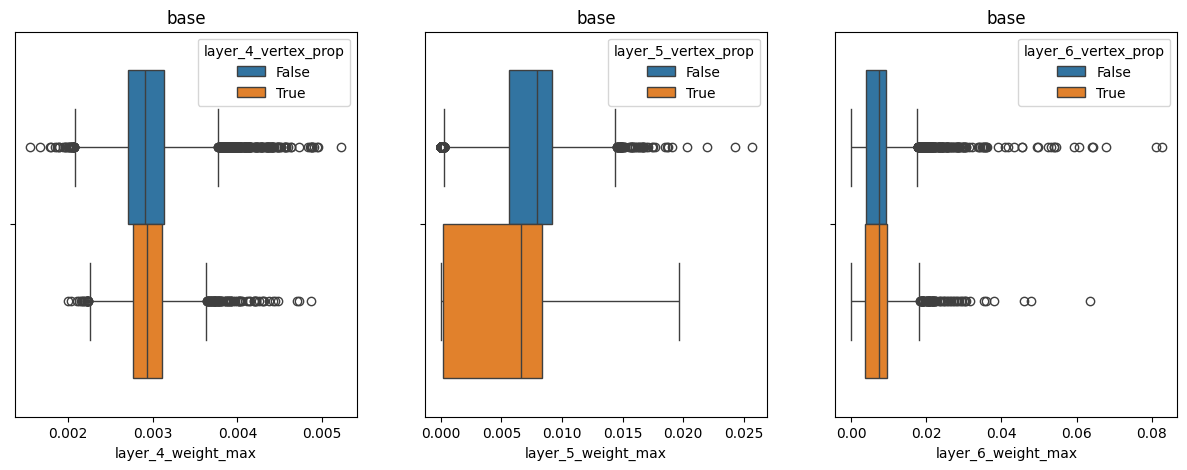

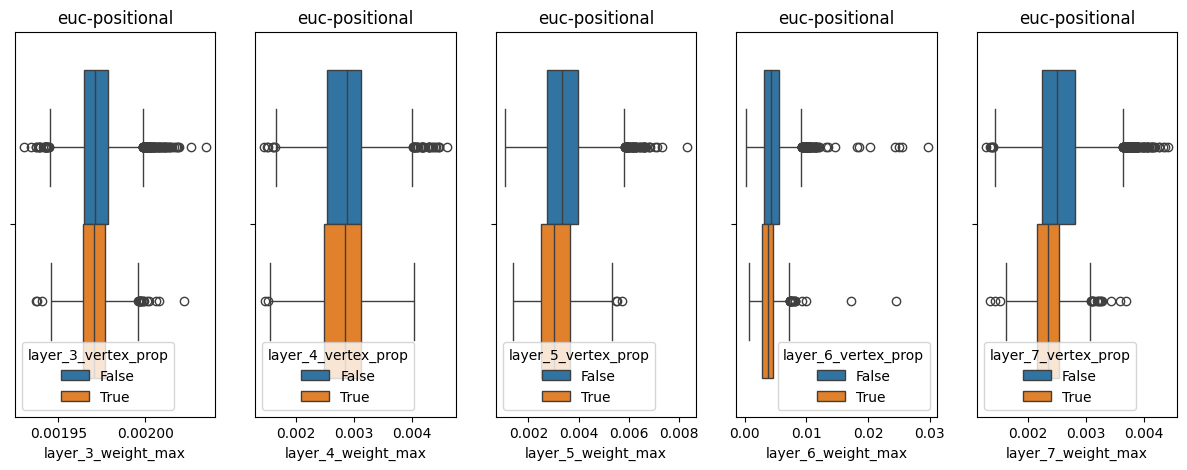

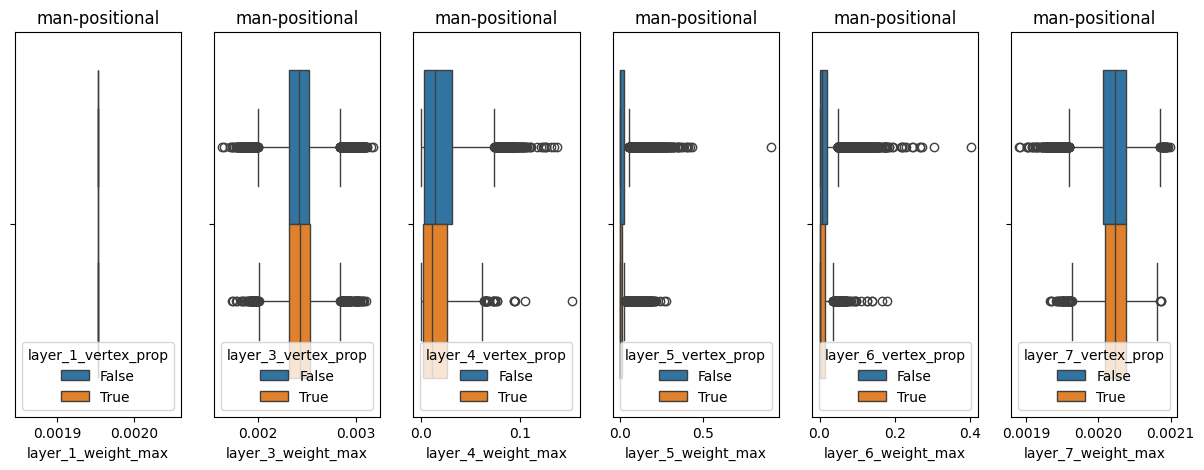

In [10]:
# NOTE: Using hull_stats['base']['layer_3_vertex_prop'].describe(), the 75% is 0.206. Thus, 75% of tokens
#       are a vertex on the K hull less than 20% of the time. For the few tokens that have a large chance 
#       of occurring on the convex hull, what is the distribution of maximum weight assigned? 
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('norm_mean')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        weight_col = col.replace('norm_mean', 'weight_max')
        prop_col = col.replace('norm_mean', 'vertex_prop')
        sns.boxplot(
            x=hull_stats[exp][weight_col], 
            hue=hull_stats[exp][prop_col] < 0.5, 
            ax=ax[i]
        )
        ax[i].set_title(exp)

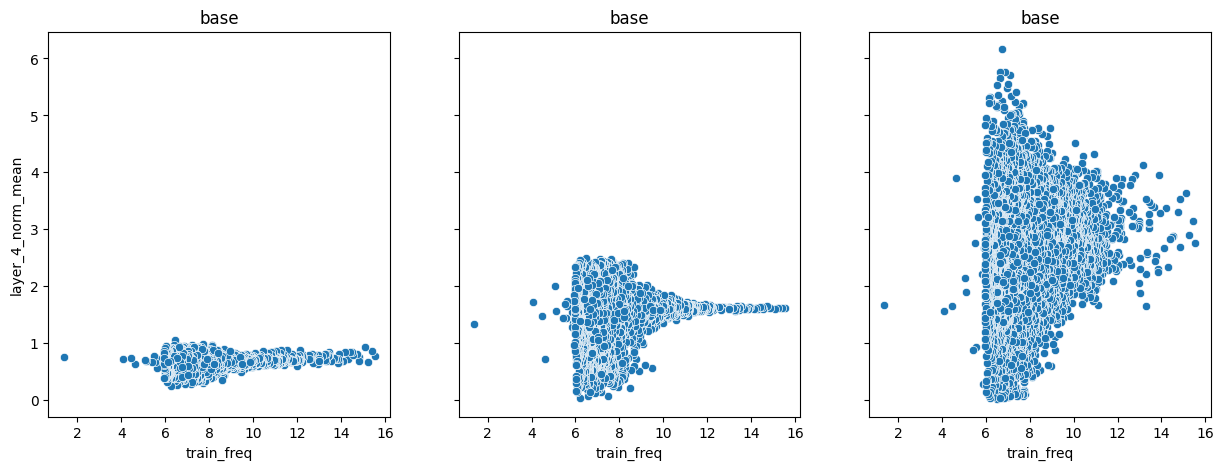

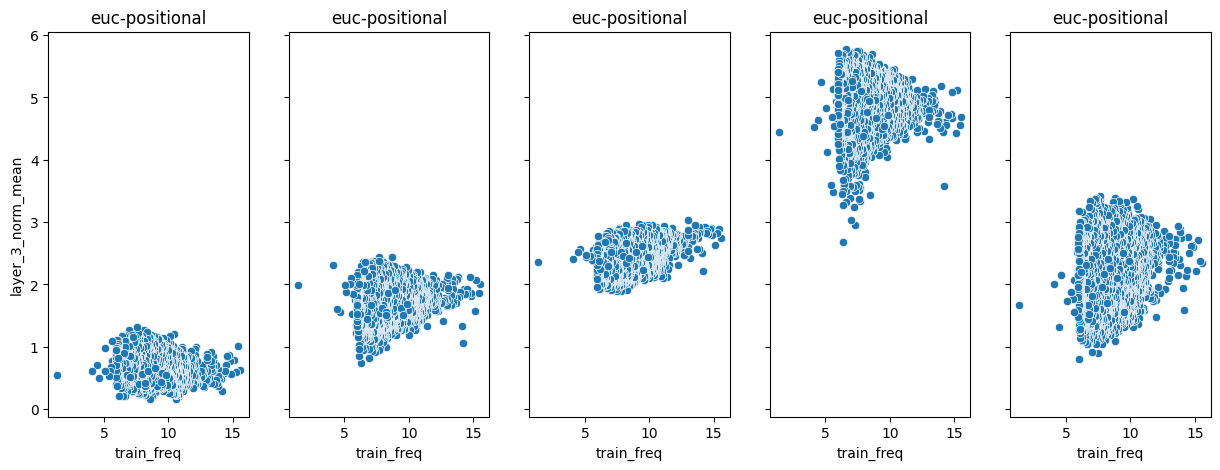

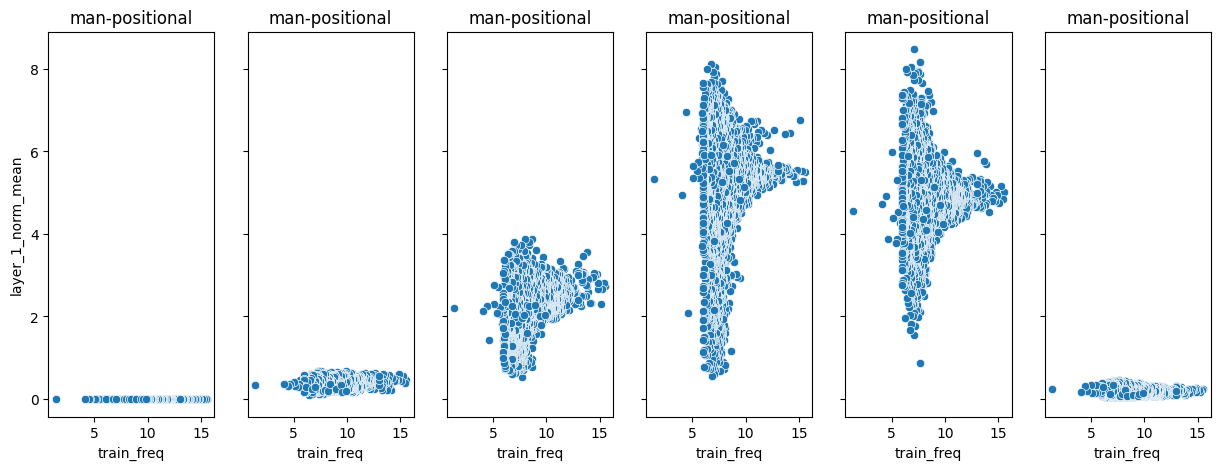

In [11]:
# Is there a relationship between training frequency and the embedding norm of a token inside an attention head?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('norm_mean')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.scatterplot(
            x=np.log(hull_stats[exp]['train_freq'] + 1), 
            y=hull_stats[exp][col],
            ax=ax[i]
        )
        ax[i].set_title(exp)

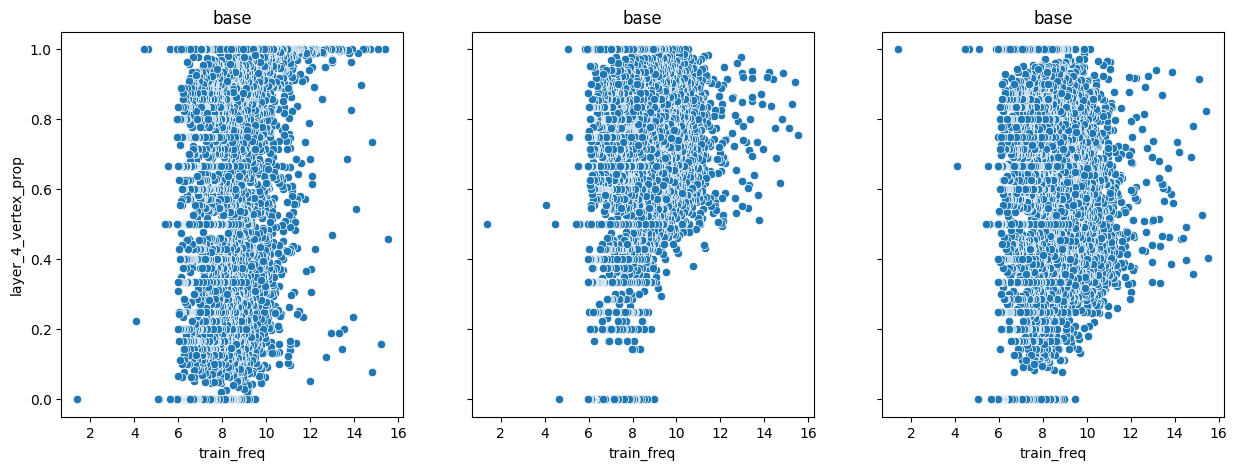

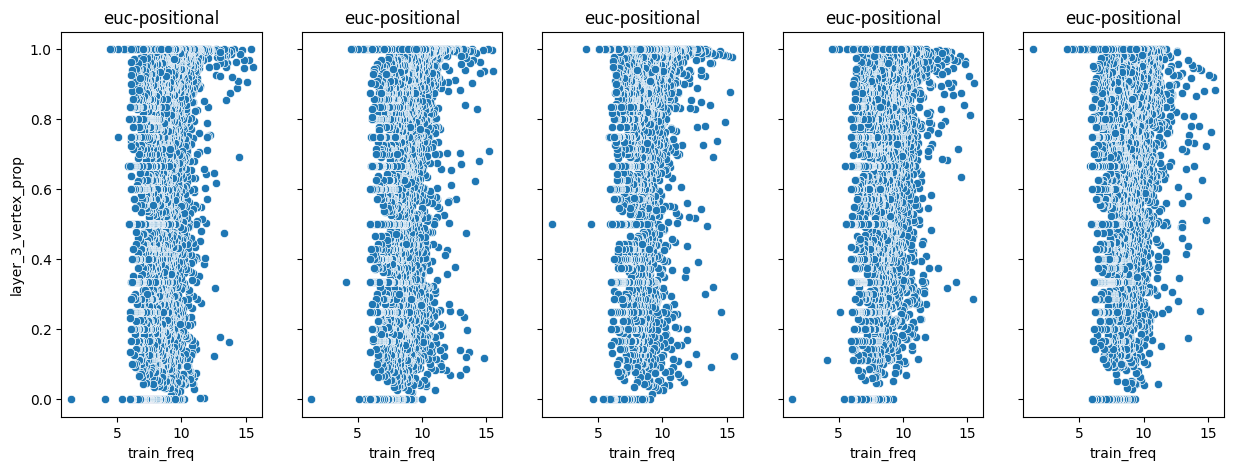

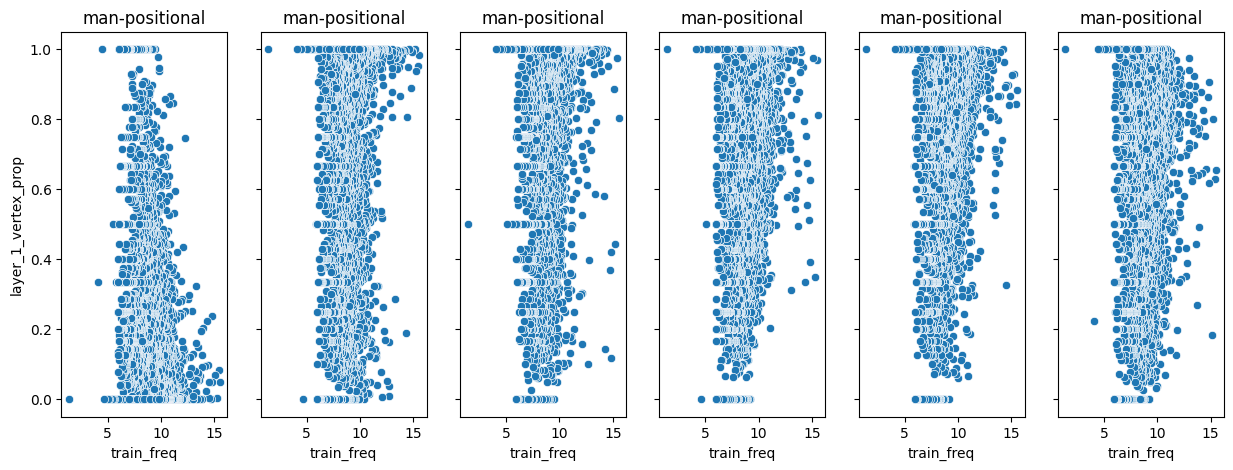

In [12]:
# Is there a relationship between training frequency and the vertex proportion of a token inside an attention head?
for exp in hull_stats:
    norm_cols = [col for col in hull_stats[exp].columns if col.endswith('vertex_prop')]
    active_cols = [col for col in norm_cols if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.scatterplot(
            x=np.log(hull_stats[exp]['train_freq'] + 1), 
            y=hull_stats[exp][col],
            ax=ax[i]
        )
        ax[i].set_title(exp)

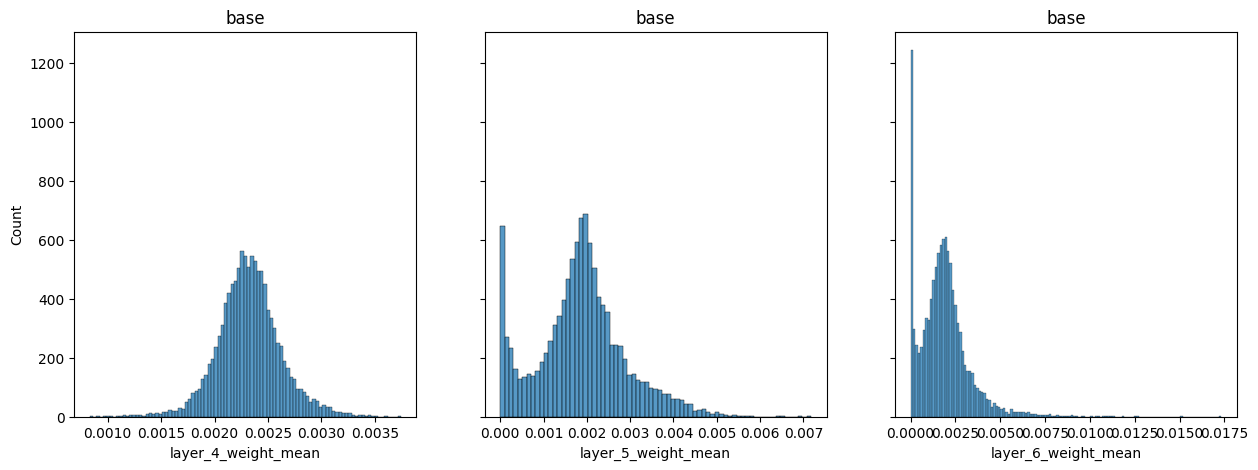

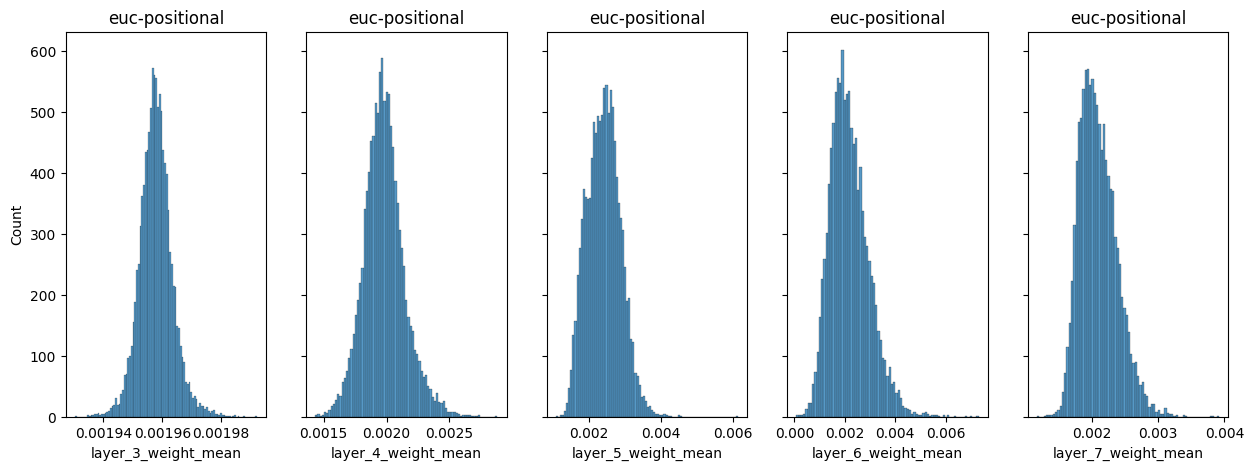

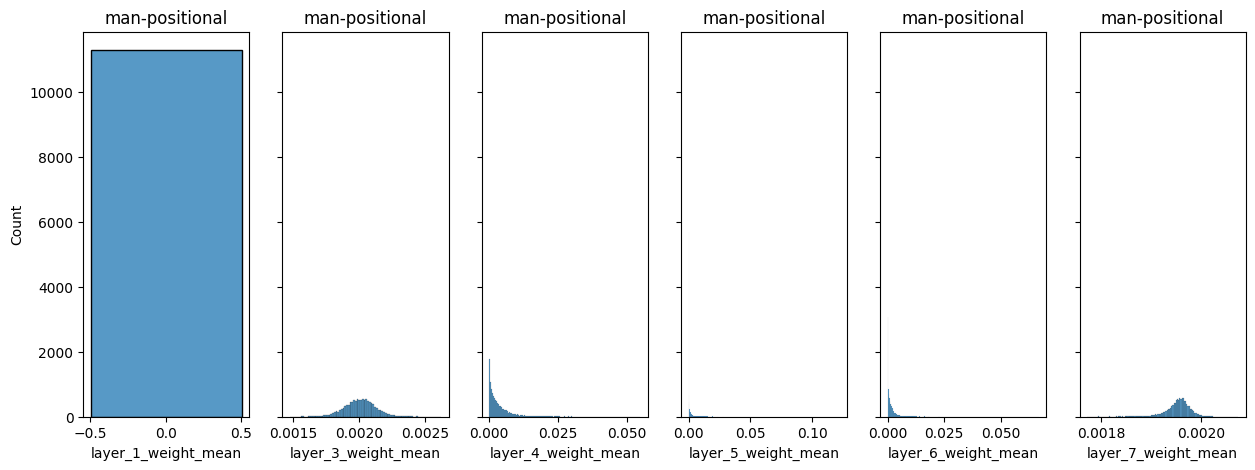

In [13]:
# What is the distribution of attention weights in each layer?
for exp in hull_stats:
    cols_to_plot = [col for col in hull_stats[exp].columns if col.endswith('weight_mean')]
    active_cols = [col for col in cols_to_plot if hull_stats[exp][col].isna().sum() != len(hull_stats[exp])]
    fig, ax = plt.subplots(1, len(active_cols), sharey=True)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i, col in enumerate(active_cols):
        sns.histplot(x=hull_stats[exp][col], ax=ax[i])
        ax[i].set_title(exp)